In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install attacut transformers sentence-transformers torch pandas numpy scikit-learn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# Cell 3: Import Libraries
import pandas as pd
import numpy as np
from attacut import tokenize
from sentence_transformers import SentenceTransformer
import pickle
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cell 4: Load and Configure Model
model_name = "Qwen/Qwen3-Embedding-0.6B"
print(f"Loading model: {model_name}")
model = SentenceTransformer(model_name)
print("Model loaded successfully")

Loading model: Qwen/Qwen3-Embedding-0.6B


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

Model loaded successfully


In [3]:
# Cell 5: Define 6C Framework
sixc_definitions = {
    'ความสามารถในการรุก': 'ความสามารถในการวางแผนและเดินหมากเพื่อ "หนีบ" กินหมากฝ่ายตรงข้าม เช่น การเล็งตำแหน่งที่สามารถล้อมฝ่ายตรงข้ามได้อย่างมีประสิทธิภาพ',
    'ความสามารถในการรับ': 'การจัดวางตำแหน่งหมากและเลือกจังหวะการเดินเพื่อป้องกันไม่ให้ถูกหนีบ รวมถึงการรักษาระยะห่างและการตั้งแนวป้องกัน',
    'การประสานงานระหว่างหมาก': 'การประสานงานระหว่างหมากของตัวเองหลายตัวเพื่อช่วยกันสร้างแนวหนีบหรือแนวป้องกันอย่างมีแบบแผน',
    'ทรัพยากรที่ยังไม่ใช้': 'จำนวนหมากที่ยังเหลืออยู่บนกระดาน และความพร้อมในการใช้หมากเหล่านั้นเพื่อสร้างความได้เปรียบในการรุกหรือรับ',
    'ความได้เปรียบด้านเวลา': 'การเลือกจังหวะการเดินหมากที่เหมาะสม เช่น เร่งจังหวะเมื่อมีโอกาส หรือถ่วงเวลาเพื่อรักษาตำแหน่งเมื่อใกล้ครบเวลา 15 นาที',
    'ความเหมาะสมกับสถานการณ์': 'การตัดสินใจเดินหมากโดยอิงตามสภาพกระดานปัจจุบัน เช่น ช่องว่าง ช่องอันตราย หรือการถูกควบคุม เพื่อให้การเดินสอดคล้องกับสถานการณ์จริง'
}

sixc_labels = list(sixc_definitions.keys())
print("6C Framework defined")

6C Framework defined


In [4]:
# Cell 6: Load Strategy Data
csv_path = '/content/drive/MyDrive/AlphaZero_Backups/data/36strategies-description.csv'
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} strategies")
df.head()

Loaded 36 strategies


,ชื่อกลยุทธ์,หมวด,ลักษณะ
0,ปิดฟ้าข้ามทะเล,กลยุทธ์ชนะศึก,ทำให้ศัตรูสบายใจ คิดว่าไม่มีแผน แล้วโจมตีทันที
1,ล้อมเวยช่วยจ้าว,กลยุทธ์ชนะศึก,บุกตีจุดสำคัญที่ศัตรูเผลอให้กำลังแตก
2,ยืมดาบฆ่าคน,กลยุทธ์ชนะศึก,ใช้กำลังหรือทรัพยากรของคนอื่นแทนตัวเอง
3,รอซ้ำยามเปลี้ย,กลยุทธ์ชนะศึก,รอให้ศัตรูเหนื่อยแล้วจึงลงมือ
4,ตีชิงตามไฟ,กลยุทธ์ชนะศึก,ฉวยโอกาสตอนศัตรูกำลังวุ่นวาย


In [5]:
# Cell 6.1: สร้างคอลัมน์ข้อความรวม (หมวด + ลักษณะ)
df['combined_text'] = df['หมวด'] + ": " + df['ลักษณะ']

print("\nตัวอย่างข้อความรวม:")
df[['ชื่อกลยุทธ์', 'combined_text']].head(2)



ตัวอย่างข้อความรวม:


,ชื่อกลยุทธ์,combined_text
0,ปิดฟ้าข้ามทะเล,กลยุทธ์ชนะศึก: ทำให้ศัตรูสบายใจ คิดว่าไม่มีแผน...
1,ล้อมเวยช่วยจ้าว,กลยุทธ์ชนะศึก: บุกตีจุดสำคัญที่ศัตรูเผลอให้กำล...


In [6]:
# Cell 7: Text Preprocessing with Attacut
def preprocess_text(text):
    if pd.isna(text):
        return ""
    tokens = tokenize(str(text))
    return ' '.join(tokens)


In [7]:
# Cell 8: Compute 6C Vector for Text (รองรับ row หรือ raw string)
def compute_6c_vector(input_):
    # ถ้าเป็น Series หรือ dict-like ให้ดึงค่าจาก 'combined_text'
    if isinstance(input_, (pd.Series, dict)):
        text = input_.get('combined_text', "")
    else:
        # สมมติเป็น raw string ก็นำตรงๆ
        text = input_
    if not text or pd.isna(text):
        return np.zeros(len(sixc_definitions))

    emb = model.encode([text])
    sims = cosine_similarity(emb, sixc_embeddings)[0]
    return sims / sims.sum()

sixc_texts = list(sixc_definitions.values())
sixc_embeddings = model.encode(sixc_texts)


In [8]:
# Cell 9: Compute 6C Patterns for All Strategies
def compute_all_strategy_patterns(df):
    strategy_patterns = {}
    for _, row in df.iterrows():
        name = row['ชื่อกลยุทธ์']
        strategy_patterns[name] = compute_6c_vector(row)
    return strategy_patterns

# เรียกใช้งาน
strategy_patterns = compute_all_strategy_patterns(df)

print("\n6C Patterns with categories:")
for name, pattern in list(strategy_patterns.items()):
    print(f"\n{name}:")
    for i, label in enumerate(sixc_labels):
        print(f"  {label}: {pattern[i]:.4f}")


6C Patterns with categories:

ปิดฟ้าข้ามทะเล:
  ความสามารถในการรุก: 0.2084
  ความสามารถในการรับ: 0.1840
  การประสานงานระหว่างหมาก: 0.1871
  ทรัพยากรที่ยังไม่ใช้: 0.1386
  ความได้เปรียบด้านเวลา: 0.1441
  ความเหมาะสมกับสถานการณ์: 0.1377

ล้อมเวยช่วยจ้าว:
  ความสามารถในการรุก: 0.2004
  ความสามารถในการรับ: 0.1756
  การประสานงานระหว่างหมาก: 0.1754
  ทรัพยากรที่ยังไม่ใช้: 0.1610
  ความได้เปรียบด้านเวลา: 0.1513
  ความเหมาะสมกับสถานการณ์: 0.1364

ยืมดาบฆ่าคน:
  ความสามารถในการรุก: 0.2142
  ความสามารถในการรับ: 0.1432
  การประสานงานระหว่างหมาก: 0.2249
  ทรัพยากรที่ยังไม่ใช้: 0.1731
  ความได้เปรียบด้านเวลา: 0.1177
  ความเหมาะสมกับสถานการณ์: 0.1269

รอซ้ำยามเปลี้ย:
  ความสามารถในการรุก: 0.1945
  ความสามารถในการรับ: 0.1620
  การประสานงานระหว่างหมาก: 0.1591
  ทรัพยากรที่ยังไม่ใช้: 0.1755
  ความได้เปรียบด้านเวลา: 0.1700
  ความเหมาะสมกับสถานการณ์: 0.1390

ตีชิงตามไฟ:
  ความสามารถในการรุก: 0.1937
  ความสามารถในการรับ: 0.1604
  การประสานงานระหว่างหมาก: 0.1645
  ทรัพยากรที่ยังไม่ใช้: 0.1516
  ความได้เปร

In [9]:
# Cell 10: Create Vector Database
print("Creating vector database...")
vector_db = {
    'strategies': {},
    'embeddings': {},
    'patterns': strategy_patterns,
    'sixc_definitions': sixc_definitions
}

for _, row in df.iterrows():
    name = row['ชื่อกลยุทธ์']
    text = row['ลักษณะ']
    category = row['หมวด']

    # Store strategy info
    vector_db['strategies'][name] = {
        'text': text,
        'category': category,
        'processed_text': preprocess_text(text)
    }

    # Store embeddings
    vector_db['embeddings'][name] = model.encode([text])[0]

print(f"Vector database created with {len(vector_db['strategies'])} strategies")

Creating vector database...
Vector database created with 36 strategies


In [10]:
# Cell 11: Save Vector Database
vector_db_path = '/content/drive/MyDrive/AlphaZero_Backups/vector_database'
os.makedirs(vector_db_path, exist_ok=True)

with open(f'{vector_db_path}/vector_database.pkl', 'wb') as f:
    pickle.dump(vector_db, f)

print(f"Vector database saved to {vector_db_path}")

Vector database saved to /content/drive/MyDrive/AlphaZero_Backups/vector_database


In [11]:
# Cell 12: Load Vector Database Function
def load_vector_database():
    vector_db_path = '/content/drive/MyDrive/AlphaZero_Backups/vector_database/vector_database.pkl'
    with open(vector_db_path, 'rb') as f:
        return pickle.load(f)


In [12]:
# Cell 13: Semantic RAG Search Function
def semantic_search(query, top_k=5):
    vector_db = load_vector_database()

    # Encode query
    query_embedding = model.encode([query])[0]

    # Calculate similarities
    similarities = {}
    for name, embedding in vector_db['embeddings'].items():
        sim = cosine_similarity([query_embedding], [embedding])[0][0]
        similarities[name] = sim

    # Sort by similarity
    sorted_results = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    return sorted_results[:top_k]


In [13]:
# Cell 14: Reranking Function (ปรับให้ส่ง text ตรงๆ เข้า compute_6c_vector)
def rerank_results(query, search_results, vector_db):
    # Compute 6C pattern for query (รองรับ string)
    query_6c = compute_6c_vector(query)

    reranked_results = []
    for strategy_name, similarity in search_results:
        strategy_6c = vector_db['patterns'][strategy_name]
        sixc_similarity = cosine_similarity(
            [query_6c], [strategy_6c]
        )[0][0]
        combined_score = (similarity * 0.6) + (sixc_similarity * 0.4)
        reranked_results.append(
            (strategy_name, combined_score, similarity, sixc_similarity)
        )

    reranked_results.sort(key=lambda x: x[1], reverse=True)
    return reranked_results

In [14]:
# Cell 15: Semantic RAG with Reranking
def semantic_rag_with_reranking(query, top_k=5):
    vector_db = load_vector_database()

    # Initial semantic search
    initial_results = semantic_search(query, top_k * 2)

    # Rerank results
    reranked_results = rerank_results(query, initial_results, vector_db)

    return reranked_results[:top_k]

In [15]:
# Cell 16: Calculate Metrics (ปรับให้ compute_6c_vector รับ string)
def calculate_metrics(query, results):
    query_6c = compute_6c_vector(query)
    vector_db = load_vector_database()

    metrics = {}
    for strategy_name, score, similarity, sixc_sim in results:
        strategy_6c = vector_db['patterns'][strategy_name]
        semantic_sim = similarity
        prob_dist = normalize([strategy_6c], norm='l1')[0]
        selection_score = score
        confidence = (semantic_sim * 0.4) + (sixc_sim * 0.3) + (selection_score * 0.3)

        # KL divergence
        eps = 1e-10
        q_norm = normalize([query_6c + eps], norm='l1')[0]
        s_norm = normalize([strategy_6c + eps], norm='l1')[0]
        kl_div = np.sum(q_norm * np.log(q_norm / s_norm))

        metrics[strategy_name] = {
            'semantic_similarity': semantic_sim,
            'probability_distribution': prob_dist,
            'selection_score': selection_score,
            'confidence_score': confidence,
            'kl_divergence': kl_div,
            'sixc_similarity': sixc_sim
        }
    return metrics

In [16]:
# Cell 17: Test Function
def test_strategy_recommendation(query):
    print(f"Query: {query}")
    print("="*50)

    # Get recommendations
    results = semantic_rag_with_reranking(query, top_k=5)

    # Calculate metrics
    metrics = calculate_metrics(query, results)

    # Display results
    for i, (strategy_name, score, similarity, sixc_sim) in enumerate(results, 1):
        print(f"\n{i}. {strategy_name}")
        print(f"   Score: {score:.4f}")
        print(f"   Confidence: {metrics[strategy_name]['confidence_score']:.4f}")
        print(f"   Similarity: {similarity:.4f}")

    return results, metrics

In [17]:
# Cell 18: Detailed Analysis Function
def detailed_analysis(query, strategy_name):
    vector_db = load_vector_database()

    print(f"Detailed Analysis for: {strategy_name}")
    print("="*50)

    # Strategy info
    strategy_info = vector_db['strategies'][strategy_name]
    print(f"Category: {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}")

    # 6C Analysis
    query_6c = compute_6c_vector(query)
    strategy_6c = vector_db['patterns'][strategy_name]

    print(f"\n6C Pattern Comparison:")
    print(f"{'Parameter':<25} {'Query':<10} {'Strategy':<10} {'Match':<10}")
    print("-"*55)

    for i, label in enumerate(sixc_labels):
        match_score = min(query_6c[i], strategy_6c[i]) / max(query_6c[i], strategy_6c[i], 1e-10)
        print(f"{label:<25} {query_6c[i]:<10.4f} {strategy_6c[i]:<10.4f} {match_score:<10.4f}")

# ปิดฟ้าข้ามทะเล

In [22]:
# Cell 18: query
test_query =  """
ทำให้ศัตรูสบายใจ คิดว่าไม่มีแผน แล้วโจมตีทันที:ทำให้ศัตรูไม่ตระหนักถึงแผนหรือภัยคุกคามที่กำลังก่อตัวขึ้นเลย โดยคุณจะวางหมากอย่างสุขุม สร้างกำลังรบอย่างลับๆ และโจมตีอย่างรวดเร็ว เด็ดขาด ในจังหวะที่ศัตรูประมาทที่สุด
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ทำให้ศัตรูสบายใจ คิดว่าไม่มีแผน แล้วโจมตีทันที:ทำให้ศัตรูไม่ตระหนักถึงแผนหรือภัยคุกคามที่กำลังก่อตัวขึ้นเลย โดยคุณจะวางหมากอย่างสุขุม สร้างกำลังรบอย่างลับๆ และโจมตีอย่างรวดเร็ว เด็ดขาด ในจังหวะที่ศัตรูประมาทที่สุด


1. ปิดฟ้าข้ามทะเล
   Score: 0.8645
   Confidence: 0.8689
   Similarity: 0.7764

2. ทุกข์กาย
   Score: 0.7312
   Confidence: 0.7400
   Similarity: 0.5549

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7289
   Confidence: 0.7377
   Similarity: 0.5531

4. ดูไฟชายฝั่ง
   Score: 0.7288
   Confidence: 0.7377
   Similarity: 0.5500

5. ลูกโซ่
   Score: 0.7263
   Confidence: 0.7353
   Similarity: 0.5468


In [23]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ปิดฟ้าข้ามทะเล
Category:    กลยุทธ์ชนะศึก
Description: ทำให้ศัตรูสบายใจ คิดว่าไม่มีแผน แล้วโจมตีทันที

Metrics:
  Semantic Similarity:    0.7764
  6C Similarity:          0.9966
  Selection Score:        0.8645
  Confidence Score:       0.8689
  KL Divergence:          0.0034

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2005,0.2084,0.9624
ความสามารถในการรับ,0.2057,0.1840,0.8949
การประสานงานระหว่างหมาก,0.1701,0.1871,0.9090
ทรัพยากรที่ยังไม่ใช้,0.1460,0.1386,0.9499
ความได้เปรียบด้านเวลา,0.1540,0.1441,0.9358
ความเหมาะสมกับสถานการณ์,0.1237,0.1377,0.8986


# ล้อมเวยช่วยจ้าว

In [24]:
# Cell 18: Example Usage
test_query =  """
บุกตีจุดสำคัญที่ศัตรูเผลอให้กำลังแตก:สังเกตหาหมากสำคัญที่ศัตรูเผลอหรือป้องกันไม่ดี แล้วใช้การหนีบเข้าโจมตีอย่างรวดเร็ว เพื่อทำลายการจัดทัพและทำให้กำลังฝ่ายตรงข้ามแตกกระจัดกระจาย
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
บุกตีจุดสำคัญที่ศัตรูเผลอให้กำลังแตก:สังเกตหาหมากสำคัญที่ศัตรูเผลอหรือป้องกันไม่ดี แล้วใช้การหนีบเข้าโจมตีอย่างรวดเร็ว เพื่อทำลายการจัดทัพและทำให้กำลังฝ่ายตรงข้ามแตกกระจัดกระจาย


1. ล้อมเวยช่วยจ้าว
   Score: 0.8786
   Confidence: 0.8826
   Similarity: 0.7991

2. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7659
   Confidence: 0.7736
   Similarity: 0.6128

3. ล่อเสือออกจากถ้ำ
   Score: 0.7626
   Confidence: 0.7704
   Similarity: 0.6070

4. ดูไฟชายฝั่ง
   Score: 0.7605
   Confidence: 0.7684
   Similarity: 0.6017

5. ปิดฟ้าข้ามทะเล
   Score: 0.7453
   Confidence: 0.7537
   Similarity: 0.5770


In [25]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ล้อมเวยช่วยจ้าว
Category:    กลยุทธ์ชนะศึก
Description: บุกตีจุดสำคัญที่ศัตรูเผลอให้กำลังแตก

Metrics:
  Semantic Similarity:    0.7991
  6C Similarity:          0.9979
  Selection Score:        0.8786
  Confidence Score:       0.8826
  KL Divergence:          0.0021

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2057,0.2004,0.9741
ความสามารถในการรับ,0.1976,0.1756,0.8886
การประสานงานระหว่างหมาก,0.1723,0.1754,0.9827
ทรัพยากรที่ยังไม่ใช้,0.1533,0.1610,0.9523
ความได้เปรียบด้านเวลา,0.1448,0.1513,0.9568
ความเหมาะสมกับสถานการณ์,0.1263,0.1364,0.9259


# ยืมดาบฆ่าคน

In [26]:
# Cell 18: Example Usage
test_query =  """
ใช้กำลังหรือทรัพยากรของคนอื่นแทนตัวเอง: โดยล่อให้ศัตรูส่งหมากเข้ามาในตำแหน่งเปราะบางที่เราตั้งกับดักไว้ จากนั้นใช้ตำแหน่งหมากของเขาเองเป็นเครื่องมือหนีบกินอย่างรวดเร็ว เสมือนใช้ “ดาบ” ของเขาทำร้ายตัวเขาเอง
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ใช้กำลังหรือทรัพยากรของคนอื่นแทนตัวเอง: โดยล่อให้ศัตรูส่งหมากเข้ามาในตำแหน่งเปราะบางที่เราตั้งกับดักไว้ จากนั้นใช้ตำแหน่งหมากของเขาเองเป็นเครื่องมือหนีบกินอย่างรวดเร็ว เสมือนใช้ “ดาบ” ของเขาทำร้ายตัวเขาเอง


1. ยืมดาบฆ่าคน
   Score: 0.7459
   Confidence: 0.7542
   Similarity: 0.5801

2. ทุกข์กาย
   Score: 0.7353
   Confidence: 0.7440
   Similarity: 0.5619

3. ดูไฟชายฝั่ง
   Score: 0.7238
   Confidence: 0.7329
   Similarity: 0.5421

4. กวนน้ำจับปลา
   Score: 0.7233
   Confidence: 0.7324
   Similarity: 0.5405

5. สาวงาม
   Score: 0.7070
   Confidence: 0.7167
   Similarity: 0.5126


In [27]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ยืมดาบฆ่าคน
Category:    กลยุทธ์ชนะศึก
Description: ใช้กำลังหรือทรัพยากรของคนอื่นแทนตัวเอง

Metrics:
  Semantic Similarity:    0.5801
  6C Similarity:          0.9945
  Selection Score:        0.7459
  Confidence Score:       0.7542
  KL Divergence:          0.0053

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2110,0.2142,0.9849
ความสามารถในการรับ,0.1679,0.1432,0.8528
การประสานงานระหว่างหมาก,0.1907,0.2249,0.8477
ทรัพยากรที่ยังไม่ใช้,0.1702,0.1731,0.9832
ความได้เปรียบด้านเวลา,0.1232,0.1177,0.9553
ความเหมาะสมกับสถานการณ์,0.1370,0.1269,0.9259


# รอซ้ำยามเปลี้ย

In [28]:
# Cell 18: Example Usage
test_query =  """
รอให้ศัตรูเหนื่อยแล้วจึงลงมือ: ตั้งรับให้มั่นคงและขยับหมากเพียงเล็กน้อยบีบให้ศัตรูใช้หมากบ่อยจนเหนื่อยล้า เมื่อเห็นช่องว่างจากการที่ศัตรูกระจัดกระจาย ให้ประสานหมากสองตัวเข้าแทรกด้านข้างแล้วหนีบกินหมากทันทีเพื่อฉวยโอกาสจบเกม
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
รอให้ศัตรูเหนื่อยแล้วจึงลงมือ: ตั้งรับให้มั่นคงและขยับหมากเพียงเล็กน้อยบีบให้ศัตรูใช้หมากบ่อยจนเหนื่อยล้า เมื่อเห็นช่องว่างจากการที่ศัตรูกระจัดกระจาย ให้ประสานหมากสองตัวเข้าแทรกด้านข้างแล้วหนีบกินหมากทันทีเพื่อฉวยโอกาสจบเกม


1. รอซ้ำยามเปลี้ย
   Score: 0.8213
   Confidence: 0.8272
   Similarity: 0.7035

2. ดูไฟชายฝั่ง
   Score: 0.7667
   Confidence: 0.7743
   Similarity: 0.6138

3. ทุกข์กาย
   Score: 0.7579
   Confidence: 0.7659
   Similarity: 0.5983

4. ถอนฟืนใต้กระทะ
   Score: 0.7441
   Confidence: 0.7524
   Similarity: 0.5789

5. กวนน้ำจับปลา
   Score: 0.7406
   Confidence: 0.7491
   Similarity: 0.5712


In [29]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: รอซ้ำยามเปลี้ย
Category:    กลยุทธ์ชนะศึก
Description: รอให้ศัตรูเหนื่อยแล้วจึงลงมือ

Metrics:
  Semantic Similarity:    0.7035
  6C Similarity:          0.9979
  Selection Score:        0.8213
  Confidence Score:       0.8272
  KL Divergence:          0.0021

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1914,0.1945,0.9842
ความสามารถในการรับ,0.1826,0.1620,0.8870
การประสานงานระหว่างหมาก,0.1638,0.1591,0.9717
ทรัพยากรที่ยังไม่ใช้,0.1668,0.1755,0.9505
ความได้เปรียบด้านเวลา,0.1568,0.1700,0.9225
ความเหมาะสมกับสถานการณ์,0.1386,0.1390,0.9975


# ตีชิงตามไฟ

In [30]:
# Cell 18: Example Usage
test_query =  """
ฉวยโอกาสตอนศัตรูกำลังวุ่นวาย:เตรียมกำลังและสร้างความวุ่นวายให้ศัตรู เมื่อเห็นช่องว่างจากการจัดหมากที่สับสนหรือไม่ตั้งตัว ให้รีบส่งหมากสำรองเข้าหนีบกินหมากสำคัญทันทีเพื่อฉวยโอกาสจบเกม
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ฉวยโอกาสตอนศัตรูกำลังวุ่นวาย:เตรียมกำลังและสร้างความวุ่นวายให้ศัตรู เมื่อเห็นช่องว่างจากการจัดหมากที่สับสนหรือไม่ตั้งตัว ให้รีบส่งหมากสำรองเข้าหนีบกินหมากสำคัญทันทีเพื่อฉวยโอกาสจบเกม


1. ตีชิงตามไฟ
   Score: 0.8034
   Confidence: 0.8098
   Similarity: 0.6744

2. กวนน้ำจับปลา
   Score: 0.7302
   Confidence: 0.7389
   Similarity: 0.5562

3. ทุกข์กาย
   Score: 0.7282
   Confidence: 0.7370
   Similarity: 0.5504

4. ดูไฟชายฝั่ง
   Score: 0.7278
   Confidence: 0.7366
   Similarity: 0.5520

5. จูงแพะติดมือ
   Score: 0.7242
   Confidence: 0.7333
   Similarity: 0.5420


In [31]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ตีชิงตามไฟ
Category:    กลยุทธ์ชนะศึก
Description: ฉวยโอกาสตอนศัตรูกำลังวุ่นวาย

Metrics:
  Semantic Similarity:    0.6744
  6C Similarity:          0.9968
  Selection Score:        0.8034
  Confidence Score:       0.8098
  KL Divergence:          0.0032

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1785,0.1937,0.9220
ความสามารถในการรับ,0.1790,0.1604,0.8959
การประสานงานระหว่างหมาก,0.1581,0.1645,0.9607
ทรัพยากรที่ยังไม่ใช้,0.1696,0.1516,0.8942
ความได้เปรียบด้านเวลา,0.1688,0.1728,0.9766
ความเหมาะสมกับสถานการณ์,0.1460,0.1570,0.9302


# ส่งเสียงบูรพาฝ่าตีประจิม

In [32]:
# Cell 18: Example Usage
test_query =  """
ล่อให้ศัตรูสนใจด้านหนึ่ง แล้วโจมตีอีกด้าน:ขยับหมากส่งเสียงล่อทางตะวันออกให้ศัตรูรวมกำลัง แล้วใช้หมากสองตัวแทรกทางตะวันตกเพื่อหนีบกินหมากสำคัญทันที
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ล่อให้ศัตรูสนใจด้านหนึ่ง แล้วโจมตีอีกด้าน:ขยับหมากส่งเสียงล่อทางตะวันออกให้ศัตรูรวมกำลัง แล้วใช้หมากสองตัวแทรกทางตะวันตกเพื่อหนีบกินหมากสำคัญทันที


1. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.8285
   Confidence: 0.8341
   Similarity: 0.7159

2. ล่อเสือออกจากถ้ำ
   Score: 0.7332
   Confidence: 0.7420
   Similarity: 0.5571

3. จับโจรเอาหัวโจก
   Score: 0.7259
   Confidence: 0.7349
   Similarity: 0.5454

4. ปิดฟ้าข้ามทะเล
   Score: 0.7230
   Confidence: 0.7321
   Similarity: 0.5408

5. ทุกข์กาย
   Score: 0.7166
   Confidence: 0.7259
   Similarity: 0.5311


In [33]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ส่งเสียงบูรพาฝ่าตีประจิม
Category:    กลยุทธ์ชนะศึก
Description: ล่อให้ศัตรูสนใจด้านหนึ่ง แล้วโจมตีอีกด้าน

Metrics:
  Semantic Similarity:    0.7159
  6C Similarity:          0.9974
  Selection Score:        0.8285
  Confidence Score:       0.8341
  KL Divergence:          0.0028

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2163,0.2114,0.9773
ความสามารถในการรับ,0.1880,0.1692,0.9000
การประสานงานระหว่างหมาก,0.1830,0.1944,0.9417
ทรัพยากรที่ยังไม่ใช้,0.1637,0.1532,0.9356
ความได้เปรียบด้านเวลา,0.1271,0.1357,0.9364
ความเหมาะสมกับสถานการณ์,0.1218,0.1360,0.8951


# มีในไม่มี

In [34]:
# Cell 18: Example Usage
test_query =  """
สร้างเรื่องลวงให้ศัตรูสับสน:สร้างภาพลวงให้ศัตรูโฟกัสผิดจุด A ด้วยการขยับหมากเล็กน้อย แล้วหักมุมใช้หมากหนีบเข้าบุกโจมตีจุด B ที่แท้จริงซึ่งศัตรูทิ้งว่างไว้
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
สร้างเรื่องลวงให้ศัตรูสับสน:สร้างภาพลวงให้ศัตรูโฟกัสผิดจุด A ด้วยการขยับหมากเล็กน้อย แล้วหักมุมใช้หมากหนีบเข้าบุกโจมตีจุด B ที่แท้จริงซึ่งศัตรูทิ้งว่างไว้


1. มีในไม่มี
   Score: 0.8681
   Confidence: 0.8724
   Similarity: 0.7817

2. สาวงาม
   Score: 0.7969
   Confidence: 0.8036
   Similarity: 0.6617

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7939
   Confidence: 0.8007
   Similarity: 0.6571

4. กวนน้ำจับปลา
   Score: 0.7594
   Confidence: 0.7674
   Similarity: 0.5999

5. ล่อเสือออกจากถ้ำ
   Score: 0.7580
   Confidence: 0.7660
   Similarity: 0.5987


In [35]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: มีในไม่มี
Category:    กลยุทธ์เผชิญศึก
Description: สร้างเรื่องลวงให้ศัตรูสับสน

Metrics:
  Semantic Similarity:    0.7817
  6C Similarity:          0.9977
  Selection Score:        0.8681
  Confidence Score:       0.8724
  KL Divergence:          0.0025

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2055,0.2096,0.9806
ความสามารถในการรับ,0.1782,0.1695,0.9513
การประสานงานระหว่างหมาก,0.1810,0.2003,0.9039
ทรัพยากรที่ยังไม่ใช้,0.1548,0.1561,0.9915
ความได้เปรียบด้านเวลา,0.1427,0.1245,0.8725
ความเหมาะสมกับสถานการณ์,0.1379,0.1401,0.9841


# ลอบตีเฉินชาง

In [36]:
# Cell 18: Example Usage
test_query =  """
ทำทีจะเข้าทางหลัก แต่บุกทางลับ:ทำทีบุกทางหลักด้วยการขยับหมากเพื่อหลอกล่อศัตรู แล้วลอบเคลื่อนหมากสำรองเข้าหนีบโจมตีทางลับที่ศัตรูไม่ทันตั้งตัวอย่างรวดเร็ว
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ทำทีจะเข้าทางหลัก แต่บุกทางลับ:ทำทีบุกทางหลักด้วยการขยับหมากเพื่อหลอกล่อศัตรู แล้วลอบเคลื่อนหมากสำรองเข้าหนีบโจมตีทางลับที่ศัตรูไม่ทันตั้งตัวอย่างรวดเร็ว


1. ลอบตีเฉินชาง
   Score: 0.8508
   Confidence: 0.8557
   Similarity: 0.7523

2. ล่อเสือออกจากถ้ำ
   Score: 0.7524
   Confidence: 0.7606
   Similarity: 0.5891

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7289
   Confidence: 0.7379
   Similarity: 0.5501

4. สาวงาม
   Score: 0.7115
   Confidence: 0.7211
   Similarity: 0.5209

5. ล้อมเวยช่วยจ้าว
   Score: 0.7091
   Confidence: 0.7187
   Similarity: 0.5181


In [37]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ลอบตีเฉินชาง
Category:    กลยุทธ์เผชิญศึก
Description: ทำทีจะเข้าทางหลัก แต่บุกทางลับ

Metrics:
  Semantic Similarity:    0.7523
  6C Similarity:          0.9985
  Selection Score:        0.8508
  Confidence Score:       0.8557
  KL Divergence:          0.0018

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2126,0.2166,0.9817
ความสามารถในการรับ,0.1922,0.1817,0.9455
การประสานงานระหว่างหมาก,0.1900,0.1849,0.9733
ทรัพยากรที่ยังไม่ใช้,0.1593,0.1516,0.9520
ความได้เปรียบด้านเวลา,0.1275,0.1288,0.9892
ความเหมาะสมกับสถานการณ์,0.1184,0.1362,0.8690


# ดูไฟชายฝั่ง

In [38]:
# Cell 18: Example Usage
test_query =  """
รอดูให้ศัตรูแตกกันเองก่อนค่อยลงมือ:ตั้งรับนิ่งๆ รอดูให้ศัตรูกระจัดกระจายตำแหน่งจนเกิดช่องว่าง แล้วส่งหมากสองตัวแทรกด้านข้างเพื่อหนีบกินทันที
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
รอดูให้ศัตรูแตกกันเองก่อนค่อยลงมือ:ตั้งรับนิ่งๆ รอดูให้ศัตรูกระจัดกระจายตำแหน่งจนเกิดช่องว่าง แล้วส่งหมากสองตัวแทรกด้านข้างเพื่อหนีบกินทันที


1. ดูไฟชายฝั่ง
   Score: 0.8635
   Confidence: 0.8680
   Similarity: 0.7728

2. ล่อเสือออกจากถ้ำ
   Score: 0.7539
   Confidence: 0.7619
   Similarity: 0.5924

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7516
   Confidence: 0.7597
   Similarity: 0.5891

4. รอซ้ำยามเปลี้ย
   Score: 0.7469
   Confidence: 0.7550
   Similarity: 0.5857

5. ปิดฟ้าข้ามทะเล
   Score: 0.7449
   Confidence: 0.7533
   Similarity: 0.5764


In [39]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ดูไฟชายฝั่ง
Category:    กลยุทธ์เผชิญศึก
Description: รอดูให้ศัตรูแตกกันเองก่อนค่อยลงมือ

Metrics:
  Semantic Similarity:    0.7728
  6C Similarity:          0.9994
  Selection Score:        0.8635
  Confidence Score:       0.8680
  KL Divergence:          0.0005

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1968,0.1997,0.9856
ความสามารถในการรับ,0.2033,0.1919,0.9436
การประสานงานระหว่างหมาก,0.1786,0.1849,0.9661
ทรัพยากรที่ยังไม่ใช้,0.1507,0.1512,0.9966
ความได้เปรียบด้านเวลา,0.1369,0.1347,0.9835
ความเหมาะสมกับสถานการณ์,0.1336,0.1377,0.9705


# ซ่อนดาบในรอยยิ้ม

In [40]:
# Cell 18: Example Usage
test_query =  """
แสร้งเป็นมิตร แล้วยิงทีหลัง:แสร้งทำเป็นมิตรด้วยการตั้งรับและชวนแลกหมากแบบไม่จริงจัง แล้วฉวยโอกาสที่ศัตรูประมาทใช้หมากหนีบเข้าโจมตีจุดสำคัญอย่างรวดเร็วและเด็ดขาด
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
แสร้งเป็นมิตร แล้วยิงทีหลัง:แสร้งทำเป็นมิตรด้วยการตั้งรับและชวนแลกหมากแบบไม่จริงจัง แล้วฉวยโอกาสที่ศัตรูประมาทใช้หมากหนีบเข้าโจมตีจุดสำคัญอย่างรวดเร็วและเด็ดขาด


1. ซ่อนดาบในรอยยิ้ม
   Score: 0.8689
   Confidence: 0.8732
   Similarity: 0.7828

2. กวนน้ำจับปลา
   Score: 0.7035
   Confidence: 0.7134
   Similarity: 0.5067

3. โยนกระเบื้องล่อหยก
   Score: 0.7028
   Confidence: 0.7126
   Similarity: 0.5074

4. ล่อเสือออกจากถ้ำ
   Score: 0.7005
   Confidence: 0.7103
   Similarity: 0.5042

5. สาวงาม
   Score: 0.7004
   Confidence: 0.7103
   Similarity: 0.5019


In [41]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ซ่อนดาบในรอยยิ้ม
Category:    กลยุทธ์เผชิญศึก
Description: แสร้งเป็นมิตร แล้วยิงทีหลัง

Metrics:
  Semantic Similarity:    0.7828
  6C Similarity:          0.9981
  Selection Score:        0.8689
  Confidence Score:       0.8732
  KL Divergence:          0.0021

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1968,0.2090,0.9416
ความสามารถในการรับ,0.1698,0.1852,0.9171
การประสานงานระหว่างหมาก,0.2048,0.2046,0.9990
ทรัพยากรที่ยังไม่ใช้,0.1607,0.1518,0.9444
ความได้เปรียบด้านเวลา,0.1273,0.1147,0.9011
ความเหมาะสมกับสถานการณ์,0.1406,0.1348,0.9586


# หลี่ตายแทนถาว

In [42]:
# Cell 18: Example Usage
test_query =  """
เสียของเล็กน้อยเพื่อได้กำไรใหญ่:ยอมเสียหมากรองเล็กน้อยเพื่อล่อให้ศัตรูประมาท แล้วฉวยโอกาสใช้การหนีบกินหมากหลักของศัตรูในจุดที่ได้เปรียบเพื่อ เสียของน้อยแต่ได้กำไรใหญ่
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
เสียของเล็กน้อยเพื่อได้กำไรใหญ่:ยอมเสียหมากรองเล็กน้อยเพื่อล่อให้ศัตรูประมาท แล้วฉวยโอกาสใช้การหนีบกินหมากหลักของศัตรูในจุดที่ได้เปรียบเพื่อ เสียของน้อยแต่ได้กำไรใหญ่


1. หลี่ตายแทนถาว
   Score: 0.8336
   Confidence: 0.8391
   Similarity: 0.7237

2. กวนน้ำจับปลา
   Score: 0.7662
   Confidence: 0.7739
   Similarity: 0.6118

3. ทุกข์กาย
   Score: 0.7509
   Confidence: 0.7591
   Similarity: 0.5859

4. จูงแพะติดมือ
   Score: 0.7455
   Confidence: 0.7538
   Similarity: 0.5782

5. สาวงาม
   Score: 0.7278
   Confidence: 0.7369
   Similarity: 0.5473


In [43]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: หลี่ตายแทนถาว
Category:    กลยุทธ์เผชิญศึก
Description: เสียของเล็กน้อยเพื่อได้กำไรใหญ่

Metrics:
  Semantic Similarity:    0.7237
  6C Similarity:          0.9985
  Selection Score:        0.8336
  Confidence Score:       0.8391
  KL Divergence:          0.0015

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2090,0.2029,0.9705
ความสามารถในการรับ,0.1668,0.1540,0.9238
การประสานงานระหว่างหมาก,0.1727,0.1867,0.9253
ทรัพยากรที่ยังไม่ใช้,0.1582,0.1677,0.9433
ความได้เปรียบด้านเวลา,0.1493,0.1462,0.9796
ความเหมาะสมกับสถานการณ์,0.1440,0.1425,0.9892


# จูงแพะติดมือ

In [44]:
# Cell 18: Example Usage
test_query =  """
ฉกเอาสิ่งเล็กๆ ตอนศัตรูไม่ทันระวัง:ดักรอและเบี่ยงเบนความสนใจศัตรู แล้วฉวยโอกาสที่คู่แข่งไม่ระวังเข้าหนีบกินหมากเล็กๆ ที่อยู่โดดเดี่ยวเพื่อสะสมความได้เปรียบ
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ฉกเอาสิ่งเล็กๆ ตอนศัตรูไม่ทันระวัง:ดักรอและเบี่ยงเบนความสนใจศัตรู แล้วฉวยโอกาสที่คู่แข่งไม่ระวังเข้าหนีบกินหมากเล็กๆ ที่อยู่โดดเดี่ยวเพื่อสะสมความได้เปรียบ


1. จูงแพะติดมือ
   Score: 0.8626
   Confidence: 0.8672
   Similarity: 0.7715

2. กวนน้ำจับปลา
   Score: 0.7471
   Confidence: 0.7554
   Similarity: 0.5812

3. ดูไฟชายฝั่ง
   Score: 0.7401
   Confidence: 0.7487
   Similarity: 0.5691

4. ทุกข์กาย
   Score: 0.7387
   Confidence: 0.7473
   Similarity: 0.5655

5. ปิดฟ้าข้ามทะเล
   Score: 0.7326
   Confidence: 0.7414
   Similarity: 0.5571


In [45]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: จูงแพะติดมือ
Category:    กลยุทธ์เผชิญศึก
Description: ฉกเอาสิ่งเล็กๆ ตอนศัตรูไม่ทันระวัง

Metrics:
  Semantic Similarity:    0.7715
  6C Similarity:          0.9992
  Selection Score:        0.8626
  Confidence Score:       0.8672
  KL Divergence:          0.0008

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1916,0.1869,0.9755
ความสามารถในการรับ,0.1786,0.1917,0.9317
การประสานงานระหว่างหมาก,0.1687,0.1732,0.9745
ทรัพยากรที่ยังไม่ใช้,0.1626,0.1587,0.9759
ความได้เปรียบด้านเวลา,0.1578,0.1550,0.9825
ความเหมาะสมกับสถานการณ์,0.1407,0.1346,0.9564


# ตีหญ้าให้งูตื่น

In [46]:
# Cell 18: Example Usage
test_query =  """
ส่งคนสอดแนมดูความเคลื่อนไหวก่อนบุก:ส่งหมากตัวเดียวเข้าหยั่งเชิง ในพื้นที่เป้าหมาย เพื่อกระตุ้นให้ศัตรูเผยแนวป้องกันและ ใช้ข้อมูลนั้นนำหมากหลักเข้าหนีบกินทันที
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ส่งคนสอดแนมดูความเคลื่อนไหวก่อนบุก:ส่งหมากตัวเดียวเข้าหยั่งเชิง ในพื้นที่เป้าหมาย เพื่อกระตุ้นให้ศัตรูเผยแนวป้องกันและ ใช้ข้อมูลนั้นนำหมากหลักเข้าหนีบกินทันที


1. ตีหญ้าให้งูตื่น
   Score: 0.8410
   Confidence: 0.8462
   Similarity: 0.7369

2. ดูไฟชายฝั่ง
   Score: 0.7459
   Confidence: 0.7544
   Similarity: 0.5770

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7453
   Confidence: 0.7537
   Similarity: 0.5779

4. ล่อเสือออกจากถ้ำ
   Score: 0.7275
   Confidence: 0.7365
   Similarity: 0.5491

5. ล้อมเวยช่วยจ้าว
   Score: 0.7160
   Confidence: 0.7254
   Similarity: 0.5280


In [47]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ตีหญ้าให้งูตื่น
Category:    กลยุทธ์เข้าตี
Description: ส่งคนสอดแนมดูความเคลื่อนไหวก่อนบุก

Metrics:
  Semantic Similarity:    0.7369
  6C Similarity:          0.9970
  Selection Score:        0.8410
  Confidence Score:       0.8462
  KL Divergence:          0.0031

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1911,0.2099,0.9105
ความสามารถในการรับ,0.1925,0.1781,0.9250
การประสานงานระหว่างหมาก,0.1849,0.1787,0.9662
ทรัพยากรที่ยังไม่ใช้,0.1478,0.1320,0.8928
ความได้เปรียบด้านเวลา,0.1477,0.1533,0.9639
ความเหมาะสมกับสถานการณ์,0.1359,0.1481,0.9175


# ยืมซากคืนชีพ

In [48]:
# Cell 18: Example Usage
test_query =  """
ใช้สิ่งที่ยังพอใช้งานสร้างประโยชน์ใหม่:นำหมากที่ดูเหมือนไร้ค่าหรือถูกละเลยกลับมาใช้งานอย่างมีประสิทธิภาพ โดยค้นพบและใช้ประโยชน์จากศักยภาพที่ซ่อนอยู่เพื่อสร้างโอกาสหนีบกิน
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ใช้สิ่งที่ยังพอใช้งานสร้างประโยชน์ใหม่:นำหมากที่ดูเหมือนไร้ค่าหรือถูกละเลยกลับมาใช้งานอย่างมีประสิทธิภาพ โดยค้นพบและใช้ประโยชน์จากศักยภาพที่ซ่อนอยู่เพื่อสร้างโอกาสหนีบกิน


1. ยืมซากคืนชีพ
   Score: 0.8631
   Confidence: 0.8676
   Similarity: 0.7732

2. หลี่ตายแทนถาว
   Score: 0.7088
   Confidence: 0.7183
   Similarity: 0.5198

3. กวนน้ำจับปลา
   Score: 0.6792
   Confidence: 0.6894
   Similarity: 0.4756

4. ยืมดาบฆ่าคน
   Score: 0.6783
   Confidence: 0.6885
   Similarity: 0.4743

5. โยนกระเบื้องล่อหยก
   Score: 0.6695
   Confidence: 0.6800
   Similarity: 0.4598


In [49]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ยืมซากคืนชีพ
Category:    กลยุทธ์เข้าตี
Description: ใช้สิ่งที่ยังพอใช้งานสร้างประโยชน์ใหม่

Metrics:
  Semantic Similarity:    0.7732
  6C Similarity:          0.9980
  Selection Score:        0.8631
  Confidence Score:       0.8676
  KL Divergence:          0.0023

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2028,0.2004,0.9885
ความสามารถในการรับ,0.1276,0.1384,0.9215
การประสานงานระหว่างหมาก,0.1714,0.1886,0.9088
ทรัพยากรที่ยังไม่ใช้,0.2069,0.2045,0.9885
ความได้เปรียบด้านเวลา,0.1399,0.1284,0.9173
ความเหมาะสมกับสถานการณ์,0.1515,0.1397,0.9222


# ล่อเสือออกจากถ้ำ

In [50]:
# Cell 18: Example Usage
test_query =  """
หลอกล่อให้ศัตรูหลุดจากป้อม แล้วบุก:วางเหยื่อล่อเพื่อหลอกให้ศัตรูถอนหมากหลักออกจากแนวป้องกัน แล้วฉวยโอกาสที่ป้อมของศัตรูอ่อนแอเข้าหนีบกินทันที
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
หลอกล่อให้ศัตรูหลุดจากป้อม แล้วบุก:วางเหยื่อล่อเพื่อหลอกให้ศัตรูถอนหมากหลักออกจากแนวป้องกัน แล้วฉวยโอกาสที่ป้อมของศัตรูอ่อนแอเข้าหนีบกินทันที


1. ล่อเสือออกจากถ้ำ
   Score: 0.9263
   Confidence: 0.9287
   Similarity: 0.8787

2. สาวงาม
   Score: 0.7593
   Confidence: 0.7672
   Similarity: 0.6024

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7498
   Confidence: 0.7580
   Similarity: 0.5867

4. ทุกข์กาย
   Score: 0.7444
   Confidence: 0.7528
   Similarity: 0.5775

5. ดูไฟชายฝั่ง
   Score: 0.7194
   Confidence: 0.7287
   Similarity: 0.5334


In [51]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ล่อเสือออกจากถ้ำ
Category:    กลยุทธ์เข้าตี
Description: หลอกล่อให้ศัตรูหลุดจากป้อม แล้วบุก

Metrics:
  Semantic Similarity:    0.8787
  6C Similarity:          0.9977
  Selection Score:        0.9263
  Confidence Score:       0.9287
  KL Divergence:          0.0021

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2033,0.2230,0.9120
ความสามารถในการรับ,0.2067,0.1879,0.9094
การประสานงานระหว่างหมาก,0.1915,0.1897,0.9907
ทรัพยากรที่ยังไม่ใช้,0.1342,0.1381,0.9717
ความได้เปรียบด้านเวลา,0.1316,0.1251,0.9509
ความเหมาะสมกับสถานการณ์,0.1327,0.1362,0.9746


# แสร้งปล่อยเพื่อจับ

In [52]:
# Cell 18: Example Usage
test_query =  """
ปล่อยให้หนีแล้วไล่บี้จนอ่อนกำลัง:แสร้งทำเป็นถอยหมากหลักเพื่อล่อให้ศัตรูไล่ตามอย่างไม่ระวัง จนกำลังกระจัดกระจายและอ่อนล้า จากนั้นจึงใช้หมากเข้าหนีบกินอย่างเด็ดขาด
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ปล่อยให้หนีแล้วไล่บี้จนอ่อนกำลัง:แสร้งทำเป็นถอยหมากหลักเพื่อล่อให้ศัตรูไล่ตามอย่างไม่ระวัง จนกำลังกระจัดกระจายและอ่อนล้า จากนั้นจึงใช้หมากเข้าหนีบกินอย่างเด็ดขาด


1. แสร้งปล่อยเพื่อจับ
   Score: 0.8506
   Confidence: 0.8555
   Similarity: 0.7526

2. ล่อเสือออกจากถ้ำ
   Score: 0.7421
   Confidence: 0.7507
   Similarity: 0.5717

3. ดูไฟชายฝั่ง
   Score: 0.7411
   Confidence: 0.7497
   Similarity: 0.5686

4. รอซ้ำยามเปลี้ย
   Score: 0.7267
   Confidence: 0.7355
   Similarity: 0.5511

5. ทุกข์กาย
   Score: 0.7204
   Confidence: 0.7296
   Similarity: 0.5356


In [53]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: แสร้งปล่อยเพื่อจับ
Category:    กลยุทธ์เข้าตี
Description: ปล่อยให้หนีแล้วไล่บี้จนอ่อนกำลัง

Metrics:
  Semantic Similarity:    0.7526
  6C Similarity:          0.9976
  Selection Score:        0.8506
  Confidence Score:       0.8555
  KL Divergence:          0.0021

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2044,0.2287,0.8939
ความสามารถในการรับ,0.1914,0.1842,0.9624
การประสานงานระหว่างหมาก,0.1784,0.1807,0.9870
ทรัพยากรที่ยังไม่ใช้,0.1532,0.1407,0.9183
ความได้เปรียบด้านเวลา,0.1308,0.1280,0.9788
ความเหมาะสมกับสถานการณ์,0.1417,0.1376,0.9709


# โยนกระเบื้องล่อหยก

In [54]:
# Cell 18: Example Usage
test_query =  """
ใช้สิ่งไม่สำคัญล่อให้หลง ยึดจริงทีหลัง:ยอมลงทุนด้วยหมากที่ไม่สำคัญเพื่อเบี่ยงเบนความสนใจศัตรู แล้วฉวยโอกาสที่คู่ต่อสู้หลงกลเคลื่อนหมากเข้าหนีบกินหมากสำคัญหรือยึดพื้นที่จริงอย่างเด็ดขาด
"""
test_results, test_metrics = test_strategy_recommendation(test_query)

Query: 
ใช้สิ่งไม่สำคัญล่อให้หลง ยึดจริงทีหลัง:ยอมลงทุนด้วยหมากที่ไม่สำคัญเพื่อเบี่ยงเบนความสนใจศัตรู แล้วฉวยโอกาสที่คู่ต่อสู้หลงกลเคลื่อนหมากเข้าหนีบกินหมากสำคัญหรือยึดพื้นที่จริงอย่างเด็ดขาด


1. โยนกระเบื้องล่อหยก
   Score: 0.8828
   Confidence: 0.8866
   Similarity: 0.8059

2. ล่อเสือออกจากถ้ำ
   Score: 0.7111
   Confidence: 0.7205
   Similarity: 0.5224

3. สาวงาม
   Score: 0.7058
   Confidence: 0.7155
   Similarity: 0.5113

4. จูงแพะติดมือ
   Score: 0.7027
   Confidence: 0.7125
   Similarity: 0.5061

5. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7019
   Confidence: 0.7118
   Similarity: 0.5056


In [55]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: โยนกระเบื้องล่อหยก
Category:    กลยุทธ์เข้าตี
Description: ใช้สิ่งไม่สำคัญล่อให้หลง ยึดจริงทีหลัง

Metrics:
  Semantic Similarity:    0.8059
  6C Similarity:          0.9980
  Selection Score:        0.8828
  Confidence Score:       0.8866
  KL Divergence:          0.0020

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1996,0.2123,0.9402
ความสามารถในการรับ,0.1804,0.1695,0.9395
การประสานงานระหว่างหมาก,0.1683,0.1783,0.9435
ทรัพยากรที่ยังไม่ใช้,0.1644,0.1477,0.8988
ความได้เปรียบด้านเวลา,0.1385,0.1423,0.9735
ความเหมาะสมกับสถานการณ์,0.1489,0.1499,0.9932


# จับโจรเอาหัวโจก

In [56]:
# Cell 18: Example Usage
test_query =     "มุ่งโจมตีผู้นำศัตรูให้ล่มทั้งกอง : ส่งหมากรองล่อให้หมากช่วยเหลือถอยออกจนหัวโจกโดดเดี่ยว แล้วขยับหมากหลักสองตัวประกบพร้อมสอดหมากตัวที่สามหนีบกินหัวโจกทันที"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: มุ่งโจมตีผู้นำศัตรูให้ล่มทั้งกอง : ส่งหมากรองล่อให้หมากช่วยเหลือถอยออกจนหัวโจกโดดเดี่ยว แล้วขยับหมากหลักสองตัวประกบพร้อมสอดหมากตัวที่สามหนีบกินหัวโจกทันที

1. จับโจรเอาหัวโจก
   Score: 0.7996
   Confidence: 0.8062
   Similarity: 0.6686

2. ล่อเสือออกจากถ้ำ
   Score: 0.7246
   Confidence: 0.7335
   Similarity: 0.5457

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7193
   Confidence: 0.7285
   Similarity: 0.5343

4. ถอนฟืนใต้กระทะ
   Score: 0.7091
   Confidence: 0.7186
   Similarity: 0.5179

5. ดูไฟชายฝั่ง
   Score: 0.7073
   Confidence: 0.7169
   Similarity: 0.5146


In [57]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: จับโจรเอาหัวโจก
Category:    กลยุทธ์เข้าตี
Description: มุ่งโจมตีผู้นำศัตรูให้ล่มทั้งกอง

Metrics:
  Semantic Similarity:    0.6686
  6C Similarity:          0.9961
  Selection Score:        0.7996
  Confidence Score:       0.8062
  KL Divergence:          0.0038

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1985,0.2220,0.8940
ความสามารถในการรับ,0.1791,0.1687,0.9417
การประสานงานระหว่างหมาก,0.1985,0.2081,0.9540
ทรัพยากรที่ยังไม่ใช้,0.1754,0.1516,0.8640
ความได้เปรียบด้านเวลา,0.1285,0.1246,0.9693
ความเหมาะสมกับสถานการณ์,0.1200,0.1251,0.9589


# ถอนฟืนใต้กระทะ

In [58]:
# Cell 18: Example Usage
test_query =      "ตัดกำลังใจศัตรูให้หมดแรงสู้ : ค่อยๆ หนีบกินหมากรองของศัตรูทีละตัวอย่างต่อเนื่อง เพื่อบดขยี้กำลังใจและทำให้ศัตรูอ่อนแรงจนยอมแพ้"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ตัดกำลังใจศัตรูให้หมดแรงสู้ : ค่อยๆ หนีบกินหมากรองของศัตรูทีละตัวอย่างต่อเนื่อง เพื่อบดขยี้กำลังใจและทำให้ศัตรูอ่อนแรงจนยอมแพ้

1. ถอนฟืนใต้กระทะ
   Score: 0.8800
   Confidence: 0.8840
   Similarity: 0.8006

2. รอซ้ำยามเปลี้ย
   Score: 0.7773
   Confidence: 0.7845
   Similarity: 0.6338

3. ทุกข์กาย
   Score: 0.7515
   Confidence: 0.7597
   Similarity: 0.5874

4. สาวงาม
   Score: 0.7398
   Confidence: 0.7484
   Similarity: 0.5665

5. ดูไฟชายฝั่ง
   Score: 0.7377
   Confidence: 0.7463
   Similarity: 0.5644


In [59]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ถอนฟืนใต้กระทะ
Category:    กลยุทธ์ติดพัน
Description: ตัดกำลังใจศัตรูให้หมดแรงสู้

Metrics:
  Semantic Similarity:    0.8006
  6C Similarity:          0.9992
  Selection Score:        0.8800
  Confidence Score:       0.8840
  KL Divergence:          0.0008

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2129,0.2095,0.9842
ความสามารถในการรับ,0.1677,0.1698,0.9878
การประสานงานระหว่างหมาก,0.1835,0.1960,0.9363
ทรัพยากรที่ยังไม่ใช้,0.1571,0.1522,0.9690
ความได้เปรียบด้านเวลา,0.1350,0.1265,0.9369
ความเหมาะสมกับสถานการณ์,0.1438,0.1460,0.9850


# กวนน้ำจับปลา

In [60]:
# Cell 18: Example Usage
test_query =     "ใช้อาการวุ่นวายของศัตรูให้เป็นประโยชน์ : เดินหมากสร้างแรงกดดันหลายจุดให้ศัตรูวุ่นวายจนเคลื่อนหมากกระจัดกระจาย แล้วขยับหมากสองตัวชิดกันพร้อมสอดหมากตัวที่สามเข้าหนีบกินในช่องอ่อนทันที"


test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ใช้อาการวุ่นวายของศัตรูให้เป็นประโยชน์ : เดินหมากสร้างแรงกดดันหลายจุดให้ศัตรูวุ่นวายจนเคลื่อนหมากกระจัดกระจาย แล้วขยับหมากสองตัวชิดกันพร้อมสอดหมากตัวที่สามเข้าหนีบกินในช่องอ่อนทันที

1. กวนน้ำจับปลา
   Score: 0.8396
   Confidence: 0.8449
   Similarity: 0.7332

2. ทุกข์กาย
   Score: 0.7226
   Confidence: 0.7319
   Similarity: 0.5383

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7167
   Confidence: 0.7261
   Similarity: 0.5296

4. ถอนฟืนใต้กระทะ
   Score: 0.7109
   Confidence: 0.7205
   Similarity: 0.5198

5. ดูไฟชายฝั่ง
   Score: 0.7103
   Confidence: 0.7199
   Similarity: 0.5185


In [61]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: กวนน้ำจับปลา
Category:    กลยุทธ์ติดพัน
Description: ใช้อาการวุ่นวายของศัตรูให้เป็นประโยชน์

Metrics:
  Semantic Similarity:    0.7332
  6C Similarity:          0.9993
  Selection Score:        0.8396
  Confidence Score:       0.8449
  KL Divergence:          0.0007

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1915,0.1981,0.9666
ความสามารถในการรับ,0.1744,0.1701,0.9756
การประสานงานระหว่างหมาก,0.1822,0.1926,0.9462
ทรัพยากรที่ยังไม่ใช้,0.1590,0.1520,0.9560
ความได้เปรียบด้านเวลา,0.1420,0.1369,0.9637
ความเหมาะสมกับสถานการณ์,0.1509,0.1503,0.9961


# จักจั่นลอกคราบ

In [62]:
# Cell 18: Example Usage
test_query =      "ทำเหมือนไม่ขยับ ก่อนเปลี่ยนแผนฉับพลัน: แกล้งทำเป็นไม่เคลื่อนไหวหมากหรือเคลื่อนไหวเชื่องช้า เพื่อลวงศัตรูให้ตายใจว่าไม่มีแผนการ จากนั้นจึงพลิกสถานการณ์ด้วยการส่งหมากเข้าหนีบโจมตีอย่างฉับพลันจากแนวที่ดูเฉื่อยชา"


test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ทำเหมือนไม่ขยับ ก่อนเปลี่ยนแผนฉับพลัน: แกล้งทำเป็นไม่เคลื่อนไหวหมากหรือเคลื่อนไหวเชื่องช้า เพื่อลวงศัตรูให้ตายใจว่าไม่มีแผนการ จากนั้นจึงพลิกสถานการณ์ด้วยการส่งหมากเข้าหนีบโจมตีอย่างฉับพลันจากแนวที่ดูเฉื่อยชา

1. จักจั่นลอกคราบ
   Score: 0.8428
   Confidence: 0.8480
   Similarity: 0.7384

2. ปิดฟ้าข้ามทะเล
   Score: 0.7627
   Confidence: 0.7706
   Similarity: 0.6052

3. ตีหญ้าให้งูตื่น
   Score: 0.7009
   Confidence: 0.7109
   Similarity: 0.5020

4. ลูกโซ่
   Score: 0.7000
   Confidence: 0.7099
   Similarity: 0.5023

5. ดูไฟชายฝั่ง
   Score: 0.6820
   Confidence: 0.6926
   Similarity: 0.4715


In [63]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: จักจั่นลอกคราบ
Category:    กลยุทธ์ติดพัน
Description: ทำเหมือนไม่ขยับ ก่อนเปลี่ยนแผนฉับพลัน

Metrics:
  Semantic Similarity:    0.7384
  6C Similarity:          0.9994
  Selection Score:        0.8428
  Confidence Score:       0.8480
  KL Divergence:          0.0007

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2094,0.2073,0.9899
ความสามารถในการรับ,0.1803,0.1794,0.9952
การประสานงานระหว่างหมาก,0.1784,0.1889,0.9441
ทรัพยากรที่ยังไม่ใช้,0.1381,0.1313,0.9508
ความได้เปรียบด้านเวลา,0.1404,0.1450,0.9686
ความเหมาะสมกับสถานการณ์,0.1535,0.1482,0.9653


# ปิดประตูจับโจร

In [64]:
# Cell 18: Example Usage
test_query =     "ล้อมรอบจนศัตรูหนีไม่ได้:เดินหมากล่อเปิดหลายช่องให้ศัตรูวิ่งตอบโต้ ขยับหมากกระชับวงล้อมเป็นชั้นๆ ปิดทุกทางหนี แล้วใช้สองตัวประกบพร้อมสอดตัวที่สามหนีบกินในช่องสุดท้าย"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ล้อมรอบจนศัตรูหนีไม่ได้:เดินหมากล่อเปิดหลายช่องให้ศัตรูวิ่งตอบโต้ ขยับหมากกระชับวงล้อมเป็นชั้นๆ ปิดทุกทางหนี แล้วใช้สองตัวประกบพร้อมสอดตัวที่สามหนีบกินในช่องสุดท้าย

1. ปิดประตูจับโจร
   Score: 0.8104
   Confidence: 0.8167
   Similarity: 0.6854

2. ล่อเสือออกจากถ้ำ
   Score: 0.7658
   Confidence: 0.7736
   Similarity: 0.6104

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7388
   Confidence: 0.7474
   Similarity: 0.5661

4. ปิดฟ้าข้ามทะเล
   Score: 0.7147
   Confidence: 0.7242
   Similarity: 0.5249

5. ขึ้นบ้านชักบันได
   Score: 0.7136
   Confidence: 0.7231
   Similarity: 0.5238


In [65]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ปิดประตูจับโจร
Category:    กลยุทธ์ติดพัน
Description: ล้อมรอบจนศัตรูหนีไม่ได้

Metrics:
  Semantic Similarity:    0.6854
  6C Similarity:          0.9979
  Selection Score:        0.8104
  Confidence Score:       0.8167
  KL Divergence:          0.0023

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2109,0.2153,0.9799
ความสามารถในการรับ,0.1874,0.1922,0.9750
การประสานงานระหว่างหมาก,0.1823,0.2016,0.9044
ทรัพยากรที่ยังไม่ใช้,0.1392,0.1354,0.9731
ความได้เปรียบด้านเวลา,0.1361,0.1273,0.9348
ความเหมาะสมกับสถานการณ์,0.1440,0.1282,0.8904


# คบไกลตีใกล้

In [66]:
# Cell 18: Example Usage
test_query =      "ผูกไมตรีกับที่ไกล แล้วตีที่ใกล้:ส่งหมากไปผูกมิตรในแนวไกลเพื่อเบี่ยงความสนใจศัตรู จากนั้นใช้หมากนั้นประสานกับหมากใกล้เพื่อหนีบกินเป้าหมายที่อยู่ใกล้ตัวศัตรูทันที"


test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ผูกไมตรีกับที่ไกล แล้วตีที่ใกล้:ส่งหมากไปผูกมิตรในแนวไกลเพื่อเบี่ยงความสนใจศัตรู จากนั้นใช้หมากนั้นประสานกับหมากใกล้เพื่อหนีบกินเป้าหมายที่อยู่ใกล้ตัวศัตรูทันที

1. คบไกลตีใกล้
   Score: 0.8696
   Confidence: 0.8739
   Similarity: 0.7834

2. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7345
   Confidence: 0.7433
   Similarity: 0.5586

3. ลูกโซ่
   Score: 0.7059
   Confidence: 0.7157
   Similarity: 0.5106

4. ล่อเสือออกจากถ้ำ
   Score: 0.7001
   Confidence: 0.7101
   Similarity: 0.5012

5. ทุกข์กาย
   Score: 0.6995
   Confidence: 0.7095
   Similarity: 0.5002


In [67]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: คบไกลตีใกล้
Category:    กลยุทธ์ติดพัน
Description: ผูกไมตรีกับที่ไกล แล้วตีที่ใกล้

Metrics:
  Semantic Similarity:    0.7834
  6C Similarity:          0.9988
  Selection Score:        0.8696
  Confidence Score:       0.8739
  KL Divergence:          0.0012

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2101,0.1993,0.9490
ความสามารถในการรับ,0.1846,0.1950,0.9464
การประสานงานระหว่างหมาก,0.1856,0.1791,0.9648
ทรัพยากรที่ยังไม่ใช้,0.1405,0.1337,0.9512
ความได้เปรียบด้านเวลา,0.1441,0.1521,0.9472
ความเหมาะสมกับสถานการณ์,0.1352,0.1408,0.9602


# ยืมทางพรางกล

In [68]:
# Cell 18: Example Usage
test_query =     "ขอผ่านแล้วใช้เส้นทางโจมตี : เลื่อนหมากหน้าเปิด “เส้นทางยืม” ปลอมให้ศัตรูไม่ระวัง แล้วส่งหมากสำรองสอดผ่านเข้ามาประกบสองฝั่งพร้อมสอดตัวที่สามหนีบกินในเทิร์นเดียว"


test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ขอผ่านแล้วใช้เส้นทางโจมตี : เลื่อนหมากหน้าเปิด “เส้นทางยืม” ปลอมให้ศัตรูไม่ระวัง แล้วส่งหมากสำรองสอดผ่านเข้ามาประกบสองฝั่งพร้อมสอดตัวที่สามหนีบกินในเทิร์นเดียว

1. ยืมทางพรางกล
   Score: 0.8176
   Confidence: 0.8236
   Similarity: 0.6973

2. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7274
   Confidence: 0.7364
   Similarity: 0.5477

3. ปิดฟ้าข้ามทะเล
   Score: 0.7210
   Confidence: 0.7303
   Similarity: 0.5363

4. ล่อเสือออกจากถ้ำ
   Score: 0.7191
   Confidence: 0.7284
   Similarity: 0.5347

5. ขึ้นบ้านชักบันได
   Score: 0.7123
   Confidence: 0.7218
   Similarity: 0.5232


In [69]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ยืมทางพรางกล
Category:    กลยุทธ์ติดพัน
Description: ขอผ่านแล้วใช้เส้นทางโจมตี

Metrics:
  Semantic Similarity:    0.6973
  6C Similarity:          0.9981
  Selection Score:        0.8176
  Confidence Score:       0.8236
  KL Divergence:          0.0020

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2054,0.2099,0.9785
ความสามารถในการรับ,0.1820,0.1689,0.9279
การประสานงานระหว่างหมาก,0.1687,0.1798,0.9379
ทรัพยากรที่ยังไม่ใช้,0.1523,0.1456,0.9563
ความได้เปรียบด้านเวลา,0.1452,0.1353,0.9317
ความเหมาะสมกับสถานการณ์,0.1465,0.1605,0.9126


# ลักขื่อเปลี่ยนเสา

In [70]:
# Cell 18: Example Usage
test_query =     "สลับตำแหน่งสำคัญของศัตรู:เดินหมากล่อให้ศัตรูย้ายหมากหลักไปปิดจุดปลอม จากนั้นรีบส่งหมากประกบจุดเดิมที่ถูกทิ้งไว้แล้วหนีบกินทันทีจากช่องโหว่ที่เกิดจากการสลับตำแหน่ง"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: สลับตำแหน่งสำคัญของศัตรู:เดินหมากล่อให้ศัตรูย้ายหมากหลักไปปิดจุดปลอม จากนั้นรีบส่งหมากประกบจุดเดิมที่ถูกทิ้งไว้แล้วหนีบกินทันทีจากช่องโหว่ที่เกิดจากการสลับตำแหน่ง

1. ลักขื่อเปลี่ยนเสา
   Score: 0.8267
   Confidence: 0.8322
   Similarity: 0.7167

2. ล่อเสือออกจากถ้ำ
   Score: 0.7536
   Confidence: 0.7616
   Similarity: 0.5938

3. ล้อมเวยช่วยจ้าว
   Score: 0.7320
   Confidence: 0.7408
   Similarity: 0.5546

4. ทุกข์กาย
   Score: 0.7206
   Confidence: 0.7298
   Similarity: 0.5361

5. กวนน้ำจับปลา
   Score: 0.7183
   Confidence: 0.7275
   Similarity: 0.5340


In [71]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ลักขื่อเปลี่ยนเสา
Category:    กลยุทธ์ร่วมรบ
Description: สลับตำแหน่งสำคัญของศัตรู

Metrics:
  Semantic Similarity:    0.7167
  6C Similarity:          0.9916
  Selection Score:        0.8267
  Confidence Score:       0.8322
  KL Divergence:          0.0089

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1979,0.2035,0.9725
ความสามารถในการรับ,0.1944,0.1847,0.9500
การประสานงานระหว่างหมาก,0.1628,0.2046,0.7956
ทรัพยากรที่ยังไม่ใช้,0.1511,0.1569,0.9634
ความได้เปรียบด้านเวลา,0.1518,0.1353,0.8916
ความเหมาะสมกับสถานการณ์,0.1421,0.1151,0.8101


# ชี้ต้นหม่อนด่าต้นไหว

In [72]:
# Cell 18: Example Usage
test_query =     "ขู่ให้ฝ่ายอื่นเกรงใจแทนเป้าหมายจริง:สร้างแรงกดดันหรือคุกคามหมากรองเพื่อ ข่มขู่ฝ่ายตรงข้ามให้เกรงใจ และทำให้เป้าหมายหลักเผยจุดอ่อนหรือขยับตัว ก่อนฉวยโอกาสใช้หมากหนีบเข้าโจมตีเป้าหมายหลักอย่างเด็ดขาด"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ขู่ให้ฝ่ายอื่นเกรงใจแทนเป้าหมายจริง:สร้างแรงกดดันหรือคุกคามหมากรองเพื่อ ข่มขู่ฝ่ายตรงข้ามให้เกรงใจ และทำให้เป้าหมายหลักเผยจุดอ่อนหรือขยับตัว ก่อนฉวยโอกาสใช้หมากหนีบเข้าโจมตีเป้าหมายหลักอย่างเด็ดขาด

1. ชี้ต้นหม่อนด่าต้นไหว
   Score: 0.8616
   Confidence: 0.8661
   Similarity: 0.7713

2. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7695
   Confidence: 0.7771
   Similarity: 0.6172

3. ทุกข์กาย
   Score: 0.7416
   Confidence: 0.7502
   Similarity: 0.5696

4. สาวงาม
   Score: 0.7376
   Confidence: 0.7463
   Similarity: 0.5636

5. กวนน้ำจับปลา
   Score: 0.7303
   Confidence: 0.7393
   Similarity: 0.5516


In [73]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ชี้ต้นหม่อนด่าต้นไหว
Category:    กลยุทธ์ร่วมรบ
Description: ขู่ให้ฝ่ายอื่นเกรงใจแทนเป้าหมายจริง

Metrics:
  Semantic Similarity:    0.7713
  6C Similarity:          0.9970
  Selection Score:        0.8616
  Confidence Score:       0.8661
  KL Divergence:          0.0029

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1995,0.1936,0.9701
ความสามารถในการรับ,0.1778,0.1755,0.9868
การประสานงานระหว่างหมาก,0.1771,0.2030,0.8726
ทรัพยากรที่ยังไม่ใช้,0.1537,0.1596,0.9627
ความได้เปรียบด้านเวลา,0.1490,0.1376,0.9234
ความเหมาะสมกับสถานการณ์,0.1429,0.1308,0.9154


# แสร้งทำบอแต่ไม่บ้า

In [74]:
# Cell 18: Example Usage
test_query =      "ทำเป็นโง่ก่อนแล้วออกหมัดหนัก:แกล้งทำเป็นอ่อนแอหรือยอมเสียหมากเล็กน้อย เพื่อลวงให้ศัตรูประมาทและเข้ามายึดพื้นที่ จากนั้นจึงพลิกกลับมาใช้หมากหนีบกินอย่างเด็ดขาด"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ทำเป็นโง่ก่อนแล้วออกหมัดหนัก:แกล้งทำเป็นอ่อนแอหรือยอมเสียหมากเล็กน้อย เพื่อลวงให้ศัตรูประมาทและเข้ามายึดพื้นที่ จากนั้นจึงพลิกกลับมาใช้หมากหนีบกินอย่างเด็ดขาด

1. แสร้งทำบอแต่ไม่บ้า
   Score: 0.7849
   Confidence: 0.7918
   Similarity: 0.6458

2. ทุกข์กาย
   Score: 0.7399
   Confidence: 0.7485
   Similarity: 0.5674

3. กวนน้ำจับปลา
   Score: 0.7319
   Confidence: 0.7407
   Similarity: 0.5544

4. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7241
   Confidence: 0.7332
   Similarity: 0.5421

5. สาวงาม
   Score: 0.7225
   Confidence: 0.7317
   Similarity: 0.5388


In [75]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: แสร้งทำบอแต่ไม่บ้า
Category:    กลยุทธ์ร่วมรบ
Description: ทำเป็นโง่ก่อนแล้วออกหมัดหนัก

Metrics:
  Semantic Similarity:    0.6458
  6C Similarity:          0.9935
  Selection Score:        0.7849
  Confidence Score:       0.7918
  KL Divergence:          0.0067

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1993,0.2102,0.9480
ความสามารถในการรับ,0.1760,0.1672,0.9500
การประสานงานระหว่างหมาก,0.1711,0.2072,0.8256
ทรัพยากรที่ยังไม่ใช้,0.1609,0.1607,0.9988
ความได้เปรียบด้านเวลา,0.1455,0.1303,0.8960
ความเหมาะสมกับสถานการณ์,0.1473,0.1244,0.8443


# ขึ้นบ้านชักบันได

In [76]:
# Cell 18: Example Usage
test_query =      "ตัดหนทางถอยหลังเมื่อศัตรูเข้ามา:เดินหลอกเปิดทางให้ศัตรูล่วงล้ำเข้ามา แล้วค่อยๆ ปิดทางถอยจนหมดก่อนหนีบกินในพื้นที่ปิดตาย"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ตัดหนทางถอยหลังเมื่อศัตรูเข้ามา:เดินหลอกเปิดทางให้ศัตรูล่วงล้ำเข้ามา แล้วค่อยๆ ปิดทางถอยจนหมดก่อนหนีบกินในพื้นที่ปิดตาย

1. ขึ้นบ้านชักบันได
   Score: 0.8777
   Confidence: 0.8814
   Similarity: 0.8043

2. ล่อเสือออกจากถ้ำ
   Score: 0.7694
   Confidence: 0.7766
   Similarity: 0.6250

3. ดูไฟชายฝั่ง
   Score: 0.7529
   Confidence: 0.7607
   Similarity: 0.5976

4. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7370
   Confidence: 0.7451
   Similarity: 0.5737

5. รอซ้ำยามเปลี้ย
   Score: 0.7212
   Confidence: 0.7297
   Similarity: 0.5516


In [77]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ขึ้นบ้านชักบันได
Category:    กลยุทธ์ร่วมรบ
Description: ตัดหนทางถอยหลังเมื่อศัตรูเข้ามา

Metrics:
  Semantic Similarity:    0.8043
  6C Similarity:          0.9879
  Selection Score:        0.8777
  Confidence Score:       0.8814
  KL Divergence:          0.0131

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2066,0.2077,0.9948
ความสามารถในการรับ,0.1929,0.1727,0.8952
การประสานงานระหว่างหมาก,0.1603,0.1982,0.8088
ทรัพยากรที่ยังไม่ใช้,0.1091,0.1398,0.7805
ความได้เปรียบด้านเวลา,0.1452,0.1297,0.8931
ความเหมาะสมกับสถานการณ์,0.1859,0.1520,0.8174


# ต้นไม้ผลิดอก

In [78]:
# Cell 18: Example Usage
test_query =      "เสริมกำลังเล็กให้ดูเข้มแข็ง:ค่อยๆ วางหมากเล็กในจุดอ่อน แล้วเสริมพลังทีละตัวให้ดูเข้มแข็ง ก่อนประสานหมากเข้าหนีบศัตรูอย่างเหนือความคาดหมาย"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: เสริมกำลังเล็กให้ดูเข้มแข็ง:ค่อยๆ วางหมากเล็กในจุดอ่อน แล้วเสริมพลังทีละตัวให้ดูเข้มแข็ง ก่อนประสานหมากเข้าหนีบศัตรูอย่างเหนือความคาดหมาย

1. ต้นไม้ผลิดอก
   Score: 0.8448
   Confidence: 0.8498
   Similarity: 0.7450

2. จูงแพะติดมือ
   Score: 0.7230
   Confidence: 0.7321
   Similarity: 0.5404

3. ถอนฟืนใต้กระทะ
   Score: 0.7072
   Confidence: 0.7167
   Similarity: 0.5184

4. ดูไฟชายฝั่ง
   Score: 0.7023
   Confidence: 0.7120
   Similarity: 0.5076

5. หลี่ตายแทนถาว
   Score: 0.6970
   Confidence: 0.7069
   Similarity: 0.4989


In [79]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ต้นไม้ผลิดอก
Category:    กลยุทธ์ร่วมรบ
Description: เสริมกำลังเล็กให้ดูเข้มแข็ง

Metrics:
  Semantic Similarity:    0.7450
  6C Similarity:          0.9944
  Selection Score:        0.8448
  Confidence Score:       0.8498
  KL Divergence:          0.0058

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1888,0.1951,0.9675
ความสามารถในการรับ,0.1812,0.1585,0.8746
การประสานงานระหว่างหมาก,0.1833,0.2140,0.8564
ทรัพยากรที่ยังไม่ใช้,0.1786,0.1894,0.9432
ความได้เปรียบด้านเวลา,0.1545,0.1454,0.9410
ความเหมาะสมกับสถานการณ์,0.1136,0.0976,0.8593


# สลับแขกเป็นเจ้าบ้าน

In [80]:
# Cell 18: Example Usage
test_query =      "เปลี่ยนฝ่ายให้ดูเหมือนเราเป็นเจ้าคุม:เริ่มจากยอมรับบท “แขก” ตั้งรับนิ่งๆ ให้ศัตรูมั่นใจ ก่อนค่อยประสานหมากบุกแย่งพื้นที่จนกลายเป็น “เจ้าบ้าน” ที่ควบคุมเกมและบีบฝ่ายตรงข้ามจนหมดทางหนี"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: เปลี่ยนฝ่ายให้ดูเหมือนเราเป็นเจ้าคุม:เริ่มจากยอมรับบท “แขก” ตั้งรับนิ่งๆ ให้ศัตรูมั่นใจ ก่อนค่อยประสานหมากบุกแย่งพื้นที่จนกลายเป็น “เจ้าบ้าน” ที่ควบคุมเกมและบีบฝ่ายตรงข้ามจนหมดทางหนี

1. สลับแขกเป็นเจ้าบ้าน
   Score: 0.8258
   Confidence: 0.8314
   Similarity: 0.7137

2. ตีหญ้าให้งูตื่น
   Score: 0.6640
   Confidence: 0.6750
   Similarity: 0.4447

3. ล่อเสือออกจากถ้ำ
   Score: 0.6595
   Confidence: 0.6706
   Similarity: 0.4381

4. ดูไฟชายฝั่ง
   Score: 0.6571
   Confidence: 0.6683
   Similarity: 0.4332

5. ปิดฟ้าข้ามทะเล
   Score: 0.6530
   Confidence: 0.6643
   Similarity: 0.4268


In [81]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: สลับแขกเป็นเจ้าบ้าน
Category:    กลยุทธ์ร่วมรบ
Description: เปลี่ยนฝ่ายให้ดูเหมือนเราเป็นเจ้าคุม

Metrics:
  Semantic Similarity:    0.7137
  6C Similarity:          0.9940
  Selection Score:        0.8258
  Confidence Score:       0.8314
  KL Divergence:          0.0060

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2017,0.2121,0.9508
ความสามารถในการรับ,0.1661,0.1484,0.8933
การประสานงานระหว่างหมาก,0.1800,0.2091,0.8606
ทรัพยากรที่ยังไม่ใช้,0.1524,0.1501,0.9850
ความได้เปรียบด้านเวลา,0.1226,0.1303,0.9412
ความเหมาะสมกับสถานการณ์,0.1772,0.1499,0.8463


# สาวงาม

In [82]:
# Cell 18: Example Usage
test_query =     "ใช้เสน่ห์หลอกใจศัตรูให้สับสน:เดินหมากล่อศัตรูให้สับสนด้วยการเคลื่อนไหวเบา ๆ หลอกโฟกัสผิดจุด ก่อนรวบรวมกำลังหนีบกินอย่างเด็ดขาดในจังหวะที่ศัตรูประมาท"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ใช้เสน่ห์หลอกใจศัตรูให้สับสน:เดินหมากล่อศัตรูให้สับสนด้วยการเคลื่อนไหวเบา ๆ หลอกโฟกัสผิดจุด ก่อนรวบรวมกำลังหนีบกินอย่างเด็ดขาดในจังหวะที่ศัตรูประมาท

1. สาวงาม
   Score: 0.8826
   Confidence: 0.8864
   Similarity: 0.8079

2. มีในไม่มี
   Score: 0.7826
   Confidence: 0.7896
   Similarity: 0.6439

3. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7703
   Confidence: 0.7777
   Similarity: 0.6212

4. ล่อเสือออกจากถ้ำ
   Score: 0.7582
   Confidence: 0.7660
   Similarity: 0.6012

5. ทุกข์กาย
   Score: 0.7577
   Confidence: 0.7657
   Similarity: 0.5985


In [83]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: สาวงาม
Category:    กลยุทธ์ยามพ่าย
Description: ใช้เสน่ห์หลอกใจศัตรูให้สับสน

Metrics:
  Semantic Similarity:    0.8079
  6C Similarity:          0.9947
  Selection Score:        0.8826
  Confidence Score:       0.8864
  KL Divergence:          0.0059

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2096,0.2097,0.9998
ความสามารถในการรับ,0.1803,0.1713,0.9498
การประสานงานระหว่างหมาก,0.1687,0.1886,0.8947
ทรัพยากรที่ยังไม่ใช้,0.1314,0.1565,0.8392
ความได้เปรียบด้านเวลา,0.1620,0.1391,0.8586
ความเหมาะสมกับสถานการณ์,0.1480,0.1349,0.9113


# เปิดเมือง

In [84]:
# Cell 18: Example Usage
test_query =      "แสร้งอ่อนแอให้ศัตรูลังเลก่อนบุก:เดินหมากแสร้งอ่อนแอเปิดช่องให้ศัตรูลังเล ก่อนรวบรวมกำลังซุ่มหนีบกินอย่างรวดเร็วเมื่อศัตรูเสียสมดุล"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: แสร้งอ่อนแอให้ศัตรูลังเลก่อนบุก:เดินหมากแสร้งอ่อนแอเปิดช่องให้ศัตรูลังเล ก่อนรวบรวมกำลังซุ่มหนีบกินอย่างรวดเร็วเมื่อศัตรูเสียสมดุล

1. เปิดเมือง
   Score: 0.9121
   Confidence: 0.9149
   Similarity: 0.8557

2. ล่อเสือออกจากถ้ำ
   Score: 0.7398
   Confidence: 0.7481
   Similarity: 0.5741

3. ดูไฟชายฝั่ง
   Score: 0.7355
   Confidence: 0.7441
   Similarity: 0.5631

4. รอซ้ำยามเปลี้ย
   Score: 0.7057
   Confidence: 0.7154
   Similarity: 0.5109

5. แสร้งปล่อยเพื่อจับ
   Score: 0.7051
   Confidence: 0.7146
   Similarity: 0.5153


In [85]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: เปิดเมือง
Category:    กลยุทธ์ยามพ่าย
Description: แสร้งอ่อนแอให้ศัตรูลังเลก่อนบุก

Metrics:
  Semantic Similarity:    0.8557
  6C Similarity:          0.9967
  Selection Score:        0.9121
  Confidence Score:       0.9149
  KL Divergence:          0.0036

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1927,0.2051,0.9398
ความสามารถในการรับ,0.1693,0.1813,0.9335
การประสานงานระหว่างหมาก,0.1616,0.1746,0.9257
ทรัพยากรที่ยังไม่ใช้,0.1667,0.1583,0.9494
ความได้เปรียบด้านเวลา,0.1532,0.1478,0.9648
ความเหมาะสมกับสถานการณ์,0.1565,0.1329,0.8495


# ไส้ศึก

In [86]:
# Cell 18: Example Usage
test_query =      "ใช้คนในกองทัพศัตรูสร้างความแตกแยก:เดินหมากแทรกตัวเหมือนคนในกองทัพศัตรู สร้างช่องว่างให้แยกแถวแล้วประกบหนีบกินหมากแตกแยกในเทิร์นเดียว"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ใช้คนในกองทัพศัตรูสร้างความแตกแยก:เดินหมากแทรกตัวเหมือนคนในกองทัพศัตรู สร้างช่องว่างให้แยกแถวแล้วประกบหนีบกินหมากแตกแยกในเทิร์นเดียว

1. ไส้ศึก
   Score: 0.8897
   Confidence: 0.8933
   Similarity: 0.8175

2. ดูไฟชายฝั่ง
   Score: 0.7179
   Confidence: 0.7271
   Similarity: 0.5325

3. จับโจรเอาหัวโจก
   Score: 0.7006
   Confidence: 0.7104
   Similarity: 0.5033

4. สาวงาม
   Score: 0.6987
   Confidence: 0.7086
   Similarity: 0.4995

5. ล่อเสือออกจากถ้ำ
   Score: 0.6923
   Confidence: 0.7024
   Similarity: 0.4916


In [87]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ไส้ศึก
Category:    กลยุทธ์ยามพ่าย
Description: ใช้คนในกองทัพศัตรูสร้างความแตกแยก

Metrics:
  Semantic Similarity:    0.8175
  6C Similarity:          0.9980
  Selection Score:        0.8897
  Confidence Score:       0.8933
  KL Divergence:          0.0024

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1970,0.2068,0.9526
ความสามารถในการรับ,0.1688,0.1747,0.9664
การประสานงานระหว่างหมาก,0.2030,0.2138,0.9496
ทรัพยากรที่ยังไม่ใช้,0.1699,0.1684,0.9913
ความได้เปรียบด้านเวลา,0.1214,0.1173,0.9660
ความเหมาะสมกับสถานการณ์,0.1399,0.1191,0.8510


# ทุกข์กาย

In [88]:
# Cell 18: Example Usage
test_query =     "ทำตัวเจ็บเพื่อเรียกให้ศัตรูไว้ใจ:จงใจทำหมากให้ดูอ่อนแอหรือยอมเสียเปรียบเล็กน้อยเพื่อล่อให้ศัตรูประมาทและเข้ามาใกล้ แล้วจึงใช้หมากเข้าหนีบกินอย่างรุนแรงและไม่คาดฝัน"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ทำตัวเจ็บเพื่อเรียกให้ศัตรูไว้ใจ:จงใจทำหมากให้ดูอ่อนแอหรือยอมเสียเปรียบเล็กน้อยเพื่อล่อให้ศัตรูประมาทและเข้ามาใกล้ แล้วจึงใช้หมากเข้าหนีบกินอย่างรุนแรงและไม่คาดฝัน

1. ทุกข์กาย
   Score: 0.8833
   Confidence: 0.8872
   Similarity: 0.8056

2. กวนน้ำจับปลา
   Score: 0.7790
   Confidence: 0.7864
   Similarity: 0.6325

3. รอซ้ำยามเปลี้ย
   Score: 0.7640
   Confidence: 0.7717
   Similarity: 0.6103

4. ดูไฟชายฝั่ง
   Score: 0.7637
   Confidence: 0.7716
   Similarity: 0.6073

5. สาวงาม
   Score: 0.7573
   Confidence: 0.7653
   Similarity: 0.5960


In [89]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ทุกข์กาย
Category:    กลยุทธ์ยามพ่าย
Description: ทำตัวเจ็บเพื่อเรียกให้ศัตรูไว้ใจ

Metrics:
  Semantic Similarity:    0.8056
  6C Similarity:          0.9998
  Selection Score:        0.8833
  Confidence Score:       0.8872
  KL Divergence:          0.0001

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2001,0.1938,0.9687
ความสามารถในการรับ,0.1740,0.1761,0.9884
การประสานงานระหว่างหมาก,0.1844,0.1871,0.9855
ทรัพยากรที่ยังไม่ใช้,0.1509,0.1508,0.9990
ความได้เปรียบด้านเวลา,0.1503,0.1517,0.9909
ความเหมาะสมกับสถานการณ์,0.1402,0.1405,0.9981


# ลูกโซ่

In [90]:
# Cell 18: Example Usage
test_query =      "ผูกแผนหลายขั้นให้ศัตรูตามไม่ทัน:เดินหมากผูกกับดักเป็นลูกโซ่หลายขั้นให้ศัตรูต้องตอบโต้ตามไม่ทันจนติดกับดักและถูกหนีบกินในที่สุด"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ผูกแผนหลายขั้นให้ศัตรูตามไม่ทัน:เดินหมากผูกกับดักเป็นลูกโซ่หลายขั้นให้ศัตรูต้องตอบโต้ตามไม่ทันจนติดกับดักและถูกหนีบกินในที่สุด

1. ลูกโซ่
   Score: 0.8444
   Confidence: 0.8495
   Similarity: 0.7419

2. ปิดฟ้าข้ามทะเล
   Score: 0.7320
   Confidence: 0.7409
   Similarity: 0.5544

3. ขึ้นบ้านชักบันได
   Score: 0.7197
   Confidence: 0.7290
   Similarity: 0.5332

4. ส่งเสียงบูรพาฝ่าตีประจิม
   Score: 0.7189
   Confidence: 0.7282
   Similarity: 0.5322

5. สาวงาม
   Score: 0.7154
   Confidence: 0.7249
   Similarity: 0.5267


In [91]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: ลูกโซ่
Category:    กลยุทธ์ยามพ่าย
Description: ผูกแผนหลายขั้นให้ศัตรูตามไม่ทัน

Metrics:
  Semantic Similarity:    0.7419
  6C Similarity:          0.9980
  Selection Score:        0.8444
  Confidence Score:       0.8495
  KL Divergence:          0.0023

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.2019,0.2007,0.9945
ความสามารถในการรับ,0.1692,0.1801,0.9395
การประสานงานระหว่างหมาก,0.1965,0.1974,0.9955
ทรัพยากรที่ยังไม่ใช้,0.1431,0.1379,0.9638
ความได้เปรียบด้านเวลา,0.1407,0.1540,0.9136
ความเหมาะสมกับสถานการณ์,0.1486,0.1298,0.8734


# หลบหนี

In [92]:
# Cell 18: Example Usage
test_query =      "ถอยเพื่อรอเวลาที่ดีกว่า:เดินหมากถอยอย่างรอบคอบเพื่อรักษากำลังและรอโอกาสเหมาะสมก่อนกลับมาบุกหนีบกินศัตรูอย่างมีประสิทธิภาพ"

test_results, test_metrics = test_strategy_recommendation(test_query)

Query: ถอยเพื่อรอเวลาที่ดีกว่า:เดินหมากถอยอย่างรอบคอบเพื่อรักษากำลังและรอโอกาสเหมาะสมก่อนกลับมาบุกหนีบกินศัตรูอย่างมีประสิทธิภาพ

1. หลบหนี
   Score: 0.8192
   Confidence: 0.8252
   Similarity: 0.6991

2. ทุกข์กาย
   Score: 0.7389
   Confidence: 0.7475
   Similarity: 0.5673

3. ขึ้นบ้านชักบันได
   Score: 0.7224
   Confidence: 0.7313
   Similarity: 0.5445

4. ดูไฟชายฝั่ง
   Score: 0.7219
   Confidence: 0.7309
   Similarity: 0.5414

5. รอซ้ำยามเปลี้ย
   Score: 0.7084
   Confidence: 0.7181
   Similarity: 0.5160


In [93]:
# Cell 19: Detailed Analysis
if test_results:
    top_strategy = test_results[0][0]
    vector_db = load_vector_database()

    # ดึง metrics ของ top_strategy
    metrics = test_metrics[top_strategy]

    print(f"Detailed Analysis for: {top_strategy}")
    print("="*80)

    # Strategy info
    strategy_info = vector_db['strategies'][top_strategy]
    print(f"Category:    {strategy_info['category']}")
    print(f"Description: {strategy_info['text']}\n")

    # แสดงเมตริกทั้งหมด
    print("Metrics:")
    print(f"  Semantic Similarity:    {metrics['semantic_similarity']:.4f}")
    print(f"  6C Similarity:          {metrics['sixc_similarity']:.4f}")
    print(f"  Selection Score:        {metrics['selection_score']:.4f}")
    print(f"  Confidence Score:       {metrics['confidence_score']:.4f}")
    print(f"  KL Divergence:          {metrics['kl_divergence']:.4f}")
    print()

    # 6C Analysis
    query_6c = compute_6c_vector(test_query)
    strategy_6c = vector_db['patterns'][top_strategy]

    print("-"*70)

    sixc_data = []
    epsilon = 1e-10
    for i, label in enumerate(sixc_labels):
        query_score    = query_6c[i]
        strategy_score = strategy_6c[i]
        if max(query_score, strategy_score) < epsilon:
             match_score = 1.0
        else:
             match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
        sixc_data.append([label, query_score, strategy_score, match_score])

    sixc_df = pd.DataFrame(sixc_data,
                           columns=['Parameter', 'Query Score', 'Strategy Score', 'Match Ratio'])

    from IPython.display import display
    display(
        sixc_df.style.format({
            'Query Score':    '{:.4f}',
            'Strategy Score': '{:.4f}',
            'Match Ratio':    '{:.4f}'
        }).hide(axis="index")
    )


Detailed Analysis for: หลบหนี
Category:    กลยุทธ์ยามพ่าย
Description: ถอยเพื่อรอเวลาที่ดีกว่า

Metrics:
  Semantic Similarity:    0.6991
  6C Similarity:          0.9994
  Selection Score:        0.8192
  Confidence Score:       0.8252
  KL Divergence:          0.0006

----------------------------------------------------------------------


Parameter,Query Score,Strategy Score,Match Ratio
ความสามารถในการรุก,0.1934,0.1916,0.9905
ความสามารถในการรับ,0.1753,0.1762,0.9949
การประสานงานระหว่างหมาก,0.1608,0.1608,1.0000
ทรัพยากรที่ยังไม่ใช้,0.1489,0.1497,0.9946
ความได้เปรียบด้านเวลา,0.1735,0.1834,0.9463
ความเหมาะสมกับสถานการณ์,0.1480,0.1383,0.9344


# save csv

In [94]:
# Cell 18: Collect Metrics and 6C Comparison for all strategies

# Define queries for each strategy
# (These queries are taken from the markdown cells and previous code cells)
strategy_queries = {
    'ปิดฟ้าข้ามทะเล': """
ทำให้ศัตรูสบายใจ คิดว่าไม่มีแผน แล้วโจมตีทันที:ทำให้ศัตรูไม่ตระหนักถึงแผนหรือภัยคุกคามที่กำลังก่อตัวขึ้นเลย โดยคุณจะวางหมากอย่างสุขุม สร้างกำลังรบอย่างลับๆ และโจมตีอย่างรวดเร็ว เด็ดขาด ในจังหวะที่ศัตรูประมาทที่สุด
""",
    'ล้อมเวยช่วยจ้าว': """
บุกตีจุดสำคัญที่ศัตรูเผลอให้กำลังแตก:สังเกตหาหมากสำคัญที่ศัตรูเผลอหรือป้องกันไม่ดี แล้วใช้การหนีบเข้าโจมตีอย่างรวดเร็ว เพื่อทำลายการจัดทัพและทำให้กำลังฝ่ายตรงขจัดกระจาย
""",
    'ยืมดาบฆ่าคน': """
ใช้กำลังหรือทรัพยากรของคนอื่นแทนตัวเอง: โดยล่อให้ศัตรูส่งหมากเข้ามาในตำแหน่งเปราะบางที่เราตั้งกับดักไว้ จากนั้นใช้ตำแหน่งหมากของเขาเองเป็นเครื่องมือหนีบกินอย่างรวดเร็ว เสมือนใช้ “ดาบ” ของเขาทำร้ายตัวเขาเอง
""",
    'รอซ้ำยามเปลี้ย': """
รอให้ศัตรูเหนื่อยแล้วจึงลงมือ: ตั้งรับให้มั่นคงและขยับหมากเพียงเล็กน้อยบีบให้ศัตรูใช้หมากบ่อยจนเหนื่อยล้า เมื่อเห็นช่องว่างจากการที่ศัตรูกระจัดกระจาย ให้ประสานหมากสองตัวเข้าแทรกด้านข้างแล้วหนีบกินหมากทันทีเพื่อฉวยโอกาสจบเกม
""",
    'ตีชิงตามไฟ': """
ฉวยโอกาสตอนศัตรูกำลังวุ่นวาย:เตรียมกำลังและสร้างความวุ่นวายให้ศัตรู เมื่อเห็นช่องว่างจากการจัดหมากที่สับสนหรือไม่ตั้งตัว ให้รีบส่งหมากสำรองเข้าหนีบกินหมากสำคัญทันทีเพื่อฉวยโอกาสจบเกม
""",
    'ส่งเสียงบูรพาฝ่าตีประจิม': """
ล่อให้ศัตรูสนใจด้านหนึ่ง แล้วโจมตีอีกด้าน:ขยับหมากส่งเสียงล่อทางตะวันออกให้ศัตรูรวมกำลัง แล้วใช้หมากสองตัวแทรกทางตะวันตกเพื่อหนีบกินหมากสำคัญทันที
""",
    'มีในไม่มี': """
สร้างเรื่องลวงให้ศัตรูสับสน:สร้างภาพลวงให้ศัตรูโฟกัสผิดจุด A ด้วยการขยับหมากเล็กน้อย แล้วหักมุมใช้หมากหนีบเข้าบุกโจมตีจุด B ที่แท้จริงซึ่งศัตรูทิ้งว่างไว้
""",
    'ลอบตีเฉินชาง': """
ทำทีจะเข้าทางหลัก แต่บุกทางลับ:ทำทีบุกทางหลักด้วยการขยับหมากเพื่อหลอกล่อศัตรู แล้วลอบเคลื่อนหมากสำรองเข้าหนีบโจมตีทางลับที่ศัตรูไม่ทันตั้งตัวอย่างรวดเร็ว
""",
    'ดูไฟชายฝั่ง': """
รอดูให้ศัตรูแตกกันเองก่อนค่อยลงมือ:ตั้งรับนิ่งๆ รอดูให้ศัตรูกระจัดกระจายตำแหน่งจนเกิดช่องว่าง แล้วส่งหมากสองตัวแทรกด้านข้างเพื่อหนีบกินทันที
""",
    'ซ่อนดาบในรอยยิ้ม': """
แสร้งเป็นมิตร แล้วยิงทีหลัง:แสร้งทำเป็นมิตรด้วยการตั้งรับและชวนแลกหมากแบบไม่จริงจัง แล้วฉวยโอกาสที่ศัตรูประมาทใช้หมากหนีบเข้าโจมตีจุดสำคัญอย่างรวดเร็วและเด็ดขาด
""",
    'หลี่ตายแทนถาว': """
เสียของเล็กน้อยเพื่อได้กำไรใหญ่:ยอมเสียหมากรองเล็กน้อยเพื่อล่อให้ศัตรูประมาท แล้วฉวยโอกาสใช้การหนีบกินหมากหลักของศัตรูในจุดที่ได้เปรียบเพื่อ เสียของน้อยแต่ได้กำไรใหญ่
""",
    'จูงแพะติดมือ': """
ฉกเอาสิ่งเล็กๆ ตอนศัตรูไม่ทันระวัง:ดักรอและเบี่ยงเบนความสนใจศัตรู แล้วฉวยโอกาสที่คู่แข่งไม่ระวังเข้าหนีบกินหมากเล็กๆ ที่อยู่โดดเดี่ยวเพื่อสะสมความได้เปรียบ
""",
    'ตีหญ้าให้งูตื่น': """
ส่งคนสอดแนมดูความเคลื่อนไหวก่อนบุก:ส่งหมากตัวเดียวเข้าหยั่งเชิง ในพื้นที่เป้าหมาย เพื่อกระตุ้นให้ศัตรูเผยแนวป้องกันและ ใช้ข้อมูลนั้นนำหมากหลักเข้าหนีบกินทันที
""",
    'ยืมซากคืนชีพ': """
ใช้สิ่งที่ยังพอใช้งานสร้างประโยชน์ใหม่:นำหมากที่ดูเหมือนไร้ค่าหรือถูกละเลยกลับมาใช้งานอย่างมีประสิทธิภาพ โดยค้นพบและใช้ประโยชน์จากศักยภาพที่ซ่อนอยู่เพื่อสร้างโอกาสหนีบกิน
""",
    'ล่อเสือออกจากถ้ำ': """
หลอกล่อให้ศัตรูหลุดจากป้อม แล้วบุก:วางเหยื่อล่อเพื่อหลอกให้ศัตรูถอนหมากหลักออกจากแนวป้องกัน แล้วฉวยโอกาสที่ป้อมของศัตรูอ่อนแอเข้าหนีบกินทันที
""",
    'แสร้งปล่อยเพื่อจับ': """
ปล่อยให้หนีแล้วไล่บี้จนอ่อนกำลัง:แสร้งทำเป็นถอยหมากหลักเพื่อล่อให้ศัตรูไล่ตามอย่างไม่ระวัง จนกำลังกระจัดกระจายและอ่อนล้า จากนั้นจึงใช้หมากเข้าหนีบกินอย่างเด็ดขาด
""",
    'โยนกระเบื้องล่อหยก': """
ใช้สิ่งไม่สำคัญล่อให้หลง ยึดจริงทีหลัง:ยอมลงทุนด้วยหมากที่ไม่สำคัญเพื่อเบี่ยงเบนความสนใจศัตรู แล้วฉวยโอกาสที่คู่ต่อสู้หลงกลเคลื่อนหมากเข้าหนีบกินหมากสำคัญหรือยึดพื้นที่จริงอย่างเด็ดขาด
""",
    'จับโจรเอาหัวโจก': """
มุ่งโจมตีผู้นำศัตรูให้ล่มทั้งกอง : ส่งหมากรองล่อให้หมากช่วยเหลือถอยออกจนหัวโจกโดดเดี่ยว แล้วขยับหมากหลักสองตัวประกบพร้อมสอดหมากตัวที่สามหนีบกินหัวโจกทันที
""",
    'ถอนฟืนใต้กระทะ': """
ตัดกำลังใจศัตรูให้หมดแรงสู้ : ค่อยๆ หนีบกินหมากรองของศัตรูทีละตัวอย่างต่อเนื่อง เพื่อบดขยี้กำลังใจและทำให้ศัตรูอ่อนแรงจนยอมแพ้
""",
    'กวนน้ำจับปลา': """
ใช้อาการวุ่นวายของศัตรูให้เป็นประโยชน์ : เดินหมากสร้างแรงกดดันหลายจุดให้ศัตรูวุ่นวายจนเคลื่อนหมากกระจัดกระจาย แล้วขยับหมากสองตัวชิดกันพร้อมสอดหมากตัวที่สามเข้าหนีบกินในช่องอ่อนทันที
""",
    'จักจั่นลอกคราบ': """
ทำเหมือนไม่ขยับ ก่อนเปลี่ยนแผนฉับพลัน: แกล้งทำเป็นไม่เคลื่อนไหวหมากหรือเคลื่อนไหวเชื่องช้า เพื่อลวงศัตรูให้ตายใจว่าไม่มีแผนการ จากนั้นจึงพลิกสถานการณ์ด้วยการส่งหมากเข้าหนีบโจมตีอย่างฉับพลันจากแนวที่ดูเฉื่อยชา
""",
    'ปิดประตูจับโจร': """
ล้อมรอบจนศัตรูหนีไม่ได้:เดินหมากล่อเปิดหลายช่องให้ศัตรูวิ่งตอบโต้ ขยับหมากกระชับวงล้อมเป็นชั้นๆ ปิดทุกทางหนี แล้วใช้สองตัวประกบพร้อมสอดตัวที่สามหนีบกินในช่องสุดท้าย
""",
    'คบไกลตีใกล้': """
ผูกไมตรีกับที่ไกล แล้วตีที่ใกล้:ส่งหมากไปผูกมิตรในแนวไกลเพื่อเบี่ยงความสนใจศัตรู จากนั้นใช้หมากนั้นประสานกับหมากใกล้เพื่อหนีบกินเป้าหมายที่อยู่ใกล้ตัวศัตรูทันที
""",
    'ยืมทางพรางกล': """
ขอผ่านแล้วใช้เส้นทางโจมตี : เลื่อนหมากหน้าเปิด “เส้นทางยืม” ปลอมให้ศัตรูไม่ระวัง แล้วส่งหมากสำรองสอดผ่านเข้ามาประกบสองฝั่งพร้อมสอดตัวที่สามหนีบกินในเทิร์นเดียว
""",
    'ลักขื่อเปลี่ยนเสา': """
สลับตำแหน่งสำคัญของศัตรู:เดินหมากล่อให้ศัตรูย้ายหมากหลักไปปิดจุดปลอม จากนั้นรีบส่งหมากประกบจุดเดิมที่ถูกทิ้งไว้แล้วหนีบกินทันทีจากช่องโหว่ที่เกิดจากการสลับตำแหน่ง
""",
    'ชี้ต้นหม่อนด่าต้นไหว': """
ขู่ให้ฝ่ายอื่นเกรงใจแทนเป้าหมายจริง:สร้างแรงกดดันหรือคุกคามหมากรองเพื่อ ข่มขู่ฝ่ายตรงข้ามให้เกรงใจ และทำให้เป้าหมายหลักเผยจุดอ่อนหรือขยับตัว ก่อนฉวยโอกาสใช้หมากหนีบเข้าโจมตีเป้าหมายหลักอย่างเด็ดขาด
""",
    'แสร้งทำบอแต่ไม่บ้า': """
ทำเป็นโง่ก่อนแล้วออกหมัดหนัก:แกล้งทำเป็นอ่อนแอหรือยอมเสียหมากเล็กน้อย เพื่อลวงให้ศัตรูประมาทและเข้ามายึดพื้นที่ จากนั้นจึงพลิกกลับมาใช้หมากหนีบกินอย่างเด็ดขาด
""",
    'ขึ้นบ้านชักบันได': """
ตัดหนทางถอยหลังเมื่อศัตรูเข้ามา:เดินหลอกเปิดทางให้ศัตรูล่วงล้ำเข้ามา แล้วค่อยๆ ปิดทางถอยจนหมดก่อนหนีบกินในพื้นที่ปิดตาย
""",
    'ต้นไม้ผลิดอก': """
เสริมกำลังเล็กให้ดูเข้มแข็ง:ค่อยๆ วางหมากเล็กในจุดอ่อน แล้วเสริมพลังทีละตัวให้ดูเข้มแข็ง ก่อนประสานหมากเข้าหนีบศัตรูอย่างเหนือความคาดหมาย
""",
    'สลับแขกเป็นเจ้าบ้าน': """
เปลี่ยนฝ่ายให้ดูเหมือนเราเป็นเจ้าคุม:เริ่มจากยอมรับบท “แขก” ตั้งรับนิ่งๆ ให้ศัตรูมั่นใจ ก่อนค่อยประสานหมากบุกแย่งพื้นที่จนกลายเป็น “เจ้าบ้าน” ที่ควบคุมเกมและบีบฝ่ายตรงข้ามจนหมดทางหนี
""",
    'สาวงาม': """
ใช้เสน่ห์หลอกใจศัตรูให้สับสน:เดินหมากล่อศัตรูให้สับสนด้วยการเคลื่อนไหวเบา ๆ หลอกโฟกัสผิดจุด ก่อนรวบรวมกำลังหนีบกินอย่างเด็ดขาดในจังหวะที่ศัตรูประมาท
""",
    'เปิดเมือง': """
แสร้งอ่อนแอให้ศัตรูลังเลก่อนบุก:เดินหมากแสร้งอ่อนแอเปิดช่องให้ศัตรูลังเล ก่อนรวบรวมกำลังซุ่มหนีบกินอย่างรวดเร็วเมื่อศัตรูเสียสมดุล
""",
    'ไส้ศึก': """
ใช้คนในกองทัพศัตรูสร้างความแตกแยก:เดินหมากแทรกตัวเหมือนคนในกองทัพศัตรู สร้างช่องว่างให้แยกแถวแล้วประกบหนีบกินหมากแตกแยกในเทิร์นเดียว
""",
    'ทุกข์กาย': """
ทำตัวเจ็บเพื่อเรียกให้ศัตรูไว้ใจ:จงใจทำหมากให้ดูอ่อนแอหรือยอมเสียเปรียบเล็กน้อยเพื่อล่อให้ศัตรูประมาทและเข้ามาใกล้ แล้วจึงใช้หมากเข้าหนีบกินอย่างรุนแรงและไม่คาดฝัน
""",
    'ลูกโซ่': """
ผูกแผนหลายขั้นให้ศัตรูตามไม่ทัน:เดินหมากผูกกับดักเป็นลูกโซ่หลายขั้นให้ศัตรูต้องตอบโต้ตามไม่ทันจนติดกับดักและถูกหนีบกินในที่สุด
""",
    'หลบหนี': """
ถอยเพื่อรอเวลาที่ดีกว่า:เดินหมากถอยอย่างรอบคอบเพื่อรักษากำลังและรอโอกาสเหมาะสมก่อนกลับมาบุกหนีบกินศัตรูอย่างมีประสิทธิภาพ
"""
}

all_strategies_metrics = {}
all_strategies_6c_comparison = {}

vector_db = load_vector_database() # Load the database once

for strategy_name, query_text in strategy_queries.items():
    print(f"Processing: {strategy_name}")
    try:
        # Get recommendations for the current query
        results = semantic_rag_with_reranking(query_text, top_k=1) # Get only the top result

        if results:
            top_strategy, score, similarity, sixc_sim = results[0]

            # Calculate metrics for the top result
            metrics = calculate_metrics(query_text, results) # calculate_metrics expects a list of results

            # Store metrics for the top strategy
            all_strategies_metrics[strategy_name] = metrics[top_strategy]

            # Calculate and store 6C comparison data for the top strategy
            query_6c = compute_6c_vector(query_text)
            strategy_6c = vector_db['patterns'][top_strategy]

            sixc_data = []
            epsilon = 1e-10
            for i, label in enumerate(sixc_labels):
                query_score = query_6c[i]
                strategy_score = strategy_6c[i]
                if max(query_score, strategy_score) < epsilon:
                     match_score = 1.0
                else:
                     match_score = min(query_score + epsilon, strategy_score + epsilon) / max(query_score + epsilon, strategy_score + epsilon)
                sixc_data.append({
                    'Parameter': label,
                    'Query Score': query_score,
                    'Strategy Score': strategy_score,
                    'Match Ratio': match_score
                })
            all_strategies_6c_comparison[strategy_name] = sixc_data

        else:
            print(f"No results found for query: {strategy_name}")

    except Exception as e:
        print(f"Error processing {strategy_name}: {e}")

print("\nFinished processing all strategies.")
print(f"Collected metrics for {len(all_strategies_metrics)} strategies.")
print(f"Collected 6C comparison data for {len(all_strategies_6c_comparison)} strategies.")

# You can now access the collected data in all_strategies_metrics and all_strategies_6c_comparison
# For example, to see the metrics for 'ปิดฟ้าข้ามทะเล':
# print("\nMetrics for 'ปิดฟ้าข้ามทะเล':")
# print(all_strategies_metrics.get('ปิดฟ้าข้ามทะเล'))

# To see the 6C comparison for 'ปิดฟ้าข้ามทะเล':
# print("\n6C Comparison for 'ปิดฟ้าข้ามทะเล':")
# print(all_strategies_6c_comparison.get('ปิดฟ้าข้ามทะเล'))

Processing: ปิดฟ้าข้ามทะเล
Processing: ล้อมเวยช่วยจ้าว
Processing: ยืมดาบฆ่าคน
Processing: รอซ้ำยามเปลี้ย
Processing: ตีชิงตามไฟ
Processing: ส่งเสียงบูรพาฝ่าตีประจิม
Processing: มีในไม่มี
Processing: ลอบตีเฉินชาง
Processing: ดูไฟชายฝั่ง
Processing: ซ่อนดาบในรอยยิ้ม
Processing: หลี่ตายแทนถาว
Processing: จูงแพะติดมือ
Processing: ตีหญ้าให้งูตื่น
Processing: ยืมซากคืนชีพ
Processing: ล่อเสือออกจากถ้ำ
Processing: แสร้งปล่อยเพื่อจับ
Processing: โยนกระเบื้องล่อหยก
Processing: จับโจรเอาหัวโจก
Processing: ถอนฟืนใต้กระทะ
Processing: กวนน้ำจับปลา
Processing: จักจั่นลอกคราบ
Processing: ปิดประตูจับโจร
Processing: คบไกลตีใกล้
Processing: ยืมทางพรางกล
Processing: ลักขื่อเปลี่ยนเสา
Processing: ชี้ต้นหม่อนด่าต้นไหว
Processing: แสร้งทำบอแต่ไม่บ้า
Processing: ขึ้นบ้านชักบันได
Processing: ต้นไม้ผลิดอก
Processing: สลับแขกเป็นเจ้าบ้าน
Processing: สาวงาม
Processing: เปิดเมือง
Processing: ไส้ศึก
Processing: ทุกข์กาย
Processing: ลูกโซ่
Processing: หลบหนี

Finished processing all strategies.
Collected metrics fo

In [117]:
import csv

# บันทึก metrics เป็น CSV
with open('metrics.csv', mode='w', encoding='utf-8', newline='') as f_metrics:
    fieldnames = ['Strategy'] + list(next(iter(all_strategies_metrics.values())).keys())
    writer = csv.DictWriter(f_metrics, fieldnames=fieldnames)
    writer.writeheader()
    for strategy, metrics in all_strategies_metrics.items():
        row = {'Strategy': strategy}
        row.update(metrics)
        writer.writerow(row)

# บันทึก 6C comparison เป็น CSV
with open('6c_comparison.csv', mode='w', encoding='utf-8', newline='') as f_6c:
    fieldnames = ['Strategy', 'Parameter', 'Query Score', 'Strategy Score', 'Match Ratio']
    writer = csv.DictWriter(f_6c, fieldnames=fieldnames)
    writer.writeheader()
    for strategy, sixc_data in all_strategies_6c_comparison.items():
        for item in sixc_data:
            row = {
                'Strategy': strategy,
                'Parameter': item['Parameter'],
                'Query Score': item['Query Score'],
                'Strategy Score': item['Strategy Score'],
                'Match Ratio': item['Match Ratio']
            }
            writer.writerow(row)

print("บันทึกไฟล์ metrics.csv และ 6c_comparison.csv เรียบร้อยแล้ว")


บันทึกไฟล์ metrics.csv และ 6c_comparison.csv เรียบร้อยแล้ว


In [115]:
# Calculate average metrics

import numpy as np
import pandas as pd

# Initialize lists to store metrics for aggregation
semantic_similarities = []
sixc_similarities = []
selection_scores = []
confidence_scores = []
kl_divergences = []
probability_distributions = [] # To store arrays for averaging

# Collect metrics from the dictionary
for strategy_name, metrics in all_strategies_metrics.items():
    semantic_similarities.append(metrics['semantic_similarity'])
    sixc_similarities.append(metrics['sixc_similarity'])
    selection_scores.append(metrics['selection_score'])
    confidence_scores.append(metrics['confidence_score'])
    kl_divergences.append(metrics['kl_divergence'])
    # Append the probability distribution array
    probability_distributions.append(metrics['probability_distribution'])


# Calculate average for single-value metrics
avg_semantic_similarity = np.mean(semantic_similarities)
avg_sixc_similarity = np.mean(sixc_similarities)
avg_selection_score = np.mean(selection_scores)
avg_confidence_score = np.mean(confidence_scores)
avg_kl_divergence = np.mean(kl_divergences)

# Calculate average for probability distribution
# Stack arrays and compute the mean along the first axis
avg_probability_distribution = np.mean(np.stack(probability_distributions), axis=0)

print("Average Metrics Across All Strategies:")
print("-" * 40)
print(f"Average Semantic Similarity: {avg_semantic_similarity:.4f}")
print(f"Average 6C Similarity (Cosine): {avg_sixc_similarity:.4f}")
print(f"Average Selection Score: {avg_selection_score:.4f}")
print(f"Average Confidence Score: {avg_confidence_score:.4f}")
print(f"Average KL Divergence: {avg_kl_divergence:.4f}")
print("\nAverage 6C Probability Distribution:")
print("-" * 40)

# Display average probability distribution with labels
sixc_labels = list(sixc_definitions.keys()) # Ensure sixc_labels is accessible
for i, label in enumerate(sixc_labels):
    print(f"  {label}: {avg_probability_distribution[i]:.4f}")

# You can also create a DataFrame for better visualization
avg_6c_df = pd.DataFrame({
    '6C Parameter': sixc_labels,
    'Average Score': avg_probability_distribution
})

print("\nAverage 6C Probability Distribution (DataFrame):")
display(avg_6c_df.style.format({'Average Score': '{:.4f}'}).hide(axis="index"))

Average Metrics Across All Strategies:
----------------------------------------
Average Semantic Similarity: 0.7503
Average 6C Similarity (Cosine): 0.9971
Average Selection Score: 0.8490
Average Confidence Score: 0.8539
Average KL Divergence: 0.0031

Average 6C Probability Distribution:
----------------------------------------
  ความสามารถในการรุก: 0.2059
  ความสามารถในการรับ: 0.1733
  การประสานงานระหว่างหมาก: 0.1906
  ทรัพยากรที่ยังไม่ใช้: 0.1537
  ความได้เปรียบด้านเวลา: 0.1395
  ความเหมาะสมกับสถานการณ์: 0.1371

Average 6C Probability Distribution (DataFrame):


6C Parameter,Average Score
ความสามารถในการรุก,0.2059
ความสามารถในการรับ,0.1733
การประสานงานระหว่างหมาก,0.1906
ทรัพยากรที่ยังไม่ใช้,0.1537
ความได้เปรียบด้านเวลา,0.1395
ความเหมาะสมกับสถานการณ์,0.1371


In [113]:
# Calculate average metrics for each strategy category

import numpy as np
import pandas as pd

# Ensure df is loaded and sixc_definitions is defined
if 'df' not in globals() or df is None:
    print("Loading strategy data...")
    csv_path = '/content/drive/MyDrive/AlphaZero_Backups/data/36strategies-description.csv'
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} strategies")

if 'sixc_definitions' not in globals():
     sixc_definitions = {
        'ความสามารถในการรุก': 'ความสามารถในการวางแผนและเดินหมากเพื่อ "หนีบ" กินหมากฝ่ายตรงข้าม เช่น การเล็งตำแหน่งที่สามารถล้อมฝ่ายตรงข้ามได้อย่างมีประสิทธิภาพ',
        'ความสามารถในการรับ': 'การจัดวางตำแหน่งหมากและเลือกจังหวะการเดินเพื่อป้องกันไม่ให้ถูกหนีบ รวมถึงการรักษาระยะห่างและการตั้งแนวป้องกัน',
        'การประสานงานระหว่างหมาก': 'การประสานงานระหว่างหมากของตัวเองหลายตัวเพื่อช่วยกันสร้างแนวหนีบหรือแนวป้องกันอย่างมีแบบแผน',
        'ทรัพยากรที่ยังไม่ใช้': 'จำนวนหมากที่ยังเหลืออยู่บนกระดาน และความพร้อมในการใช้หมากเหล่านั้นเพื่อสร้างความได้เปรียบในการรุกหรือรับ',
        'ความได้เปรียบด้านเวลา': 'การเลือกจังหวะการเดินหมากที่เหมาะสม เช่น เร่งจังหวะเมื่อมีโอกาส หรือถ่วงเวลาเพื่อรักษาตำแหน่งเมื่อใกล้ครบเวลา 15 นาที',
        'ความเหมาะสมกับสถานการณ์': 'การตัดสินใจเดินหมากโดยอิงตามสภาพกระดานปัจจุบัน เช่น ช่องว่าง ช่องอันตราย หรือการถูกควบคุม เพื่อให้การเดินสอดคล้องกับสถานการณ์จริง'
    }

sixc_labels = list(sixc_definitions.keys())

# Make sure all_strategies_metrics is available
if 'all_strategies_metrics' not in globals():
    print("Metrics data not found. Please run the cell to collect metrics first.")
else:
    print("Calculating average metrics per category...")

    # Create a DataFrame from the collected metrics
    metrics_list = []
    for strategy_name, metrics in all_strategies_metrics.items():
        metrics_entry = {
            'Strategy Name': strategy_name,
            'semantic_similarity': metrics['semantic_similarity'],
            'sixc_similarity': metrics['sixc_similarity'],
            'selection_score': metrics['selection_score'],
            'confidence_score': metrics['confidence_score'],
            'kl_divergence': metrics['kl_divergence']
            # Do not include probability_distribution here as it's an array
        }
        metrics_list.append(metrics_entry)

    metrics_df = pd.DataFrame(metrics_list)

    # Merge with the original df to get the category
    merged_df = pd.merge(metrics_df, df[['ชื่อกลยุทธ์', 'หมวด']], left_on='Strategy Name', right_on='ชื่อกลยุทธ์')
    merged_df = merged_df.drop(columns=['ชื่อกลยุทธ์']) # Drop redundant column

    # Calculate average metrics per category
    avg_metrics_by_category = merged_df.groupby('หมวด').agg(
        avg_semantic_similarity=('semantic_similarity', 'mean'),
        avg_sixc_similarity=('sixc_similarity', 'mean'),
        avg_selection_score=('selection_score', 'mean'),
        avg_confidence_score=('confidence_score', 'mean'),
        avg_kl_divergence=('kl_divergence', 'mean')
    ).reset_index()

    print("\nAverage Metrics per Strategy Category:")
    display(avg_metrics_by_category.style.format({
        'avg_semantic_similarity': '{:.4f}',
        'avg_sixc_similarity': '{:.4f}',
        'avg_selection_score': '{:.4f}',
        'avg_confidence_score': '{:.4f}',
        'avg_kl_divergence': '{:.4f}'
    }).hide(axis="index"))

    # --- Calculate Average 6C Probability Distribution per Category ---

    # Initialize a dictionary to store accumulated 6C patterns per category
    sixc_patterns_by_category = {category: [] for category in merged_df['หมวด'].unique()}

    # Populate the dictionary with the 6C patterns
    # Need to re-load or ensure all_strategies_6c_comparison is available
    if 'all_strategies_6c_comparison' not in globals():
         print("\n6C comparison data not found. Please run the cell to collect metrics first.")
    else:
        for strategy_name, patterns in all_strategies_6c_comparison.items():
            category = merged_df[merged_df['Strategy Name'] == strategy_name]['หมวด'].iloc[0]
            # Extract just the Strategy Score (which is the probability distribution for the strategy)
            strategy_pattern = [item['Strategy Score'] for item in patterns]
            sixc_patterns_by_category[category].append(strategy_pattern)

        print("\nAverage 6C Probability Distribution per Strategy Category:")

        # Calculate and display average 6C distribution for each category
        for category, patterns_list in sixc_patterns_by_category.items():
            if patterns_list:
                avg_pattern = np.mean(np.array(patterns_list), axis=0)
                avg_6c_cat_df = pd.DataFrame({
                    '6C Parameter': sixc_labels,
                    'Average Score': avg_pattern
                })
                print(f"\nCategory: {category}")
                display(avg_6c_cat_df.style.format({'Average Score': '{:.4f}'}).hide(axis="index"))

Calculating average metrics per category...

Average Metrics per Strategy Category:


หมวด,avg_semantic_similarity,avg_sixc_similarity,avg_selection_score,avg_confidence_score,avg_kl_divergence
กลยุทธ์ชนะศึก,0.7076,0.9968,0.8233,0.8291,0.0032
กลยุทธ์ติดพัน,0.7397,0.9988,0.8433,0.8485,0.0013
กลยุทธ์ยามพ่าย,0.7880,0.9978,0.8719,0.8761,0.0025
กลยุทธ์ร่วมรบ,0.7328,0.9931,0.8369,0.8421,0.0072
กลยุทธ์เข้าตี,0.7693,0.9974,0.8606,0.8651,0.0026
กลยุทธ์เผชิญศึก,0.7641,0.9986,0.8579,0.8626,0.0015



Average 6C Probability Distribution per Strategy Category:

Category: กลยุทธ์ชนะศึก


6C Parameter,Average Score
ความสามารถในการรุก,0.2038
ความสามารถในการรับ,0.1657
การประสานงานระหว่างหมาก,0.1842
ทรัพยากรที่ยังไม่ใช้,0.1588
ความได้เปรียบด้านเวลา,0.1486
ความเหมาะสมกับสถานการณ์,0.1388



Category: กลยุทธ์เผชิญศึก


6C Parameter,Average Score
ความสามารถในการรุก,0.2041
ความสามารถในการรับ,0.1790
การประสานงานระหว่างหมาก,0.1891
ทรัพยากรที่ยังไม่ใช้,0.1562
ความได้เปรียบด้านเวลา,0.1340
ความเหมาะสมกับสถานการณ์,0.1376



Category: กลยุทธ์เข้าตี


6C Parameter,Average Score
ความสามารถในการรุก,0.2160
ความสามารถในการรับ,0.1712
การประสานงานระหว่างหมาก,0.1874
ทรัพยากรที่ยังไม่ใช้,0.1524
ความได้เปรียบด้านเวลา,0.1336
ความเหมาะสมกับสถานการณ์,0.1394



Category: กลยุทธ์ติดพัน


6C Parameter,Average Score
ความสามารถในการรุก,0.2066
ความสามารถในการรับ,0.1792
การประสานงานระหว่างหมาก,0.1897
ทรัพยากรที่ยังไม่ใช้,0.1417
ความได้เปรียบด้านเวลา,0.1372
ความเหมาะสมกับสถานการณ์,0.1457



Category: กลยุทธ์ร่วมรบ


6C Parameter,Average Score
ความสามารถในการรุก,0.2037
ความสามารถในการรับ,0.1678
การประสานงานระหว่างหมาก,0.2060
ทรัพยากรที่ยังไม่ใช้,0.1594
ความได้เปรียบด้านเวลา,0.1348
ความเหมาะสมกับสถานการณ์,0.1283



Category: กลยุทธ์ยามพ่าย


6C Parameter,Average Score
ความสามารถในการรุก,0.2013
ความสามารถในการรับ,0.1766
การประสานงานระหว่างหมาก,0.1870
ทรัพยากรที่ยังไม่ใช้,0.1536
ความได้เปรียบด้านเวลา,0.1489
ความเหมาะสมกับสถานการณ์,0.1326


Calculating and plotting average 6C Probability Distribution per Strategy Category...


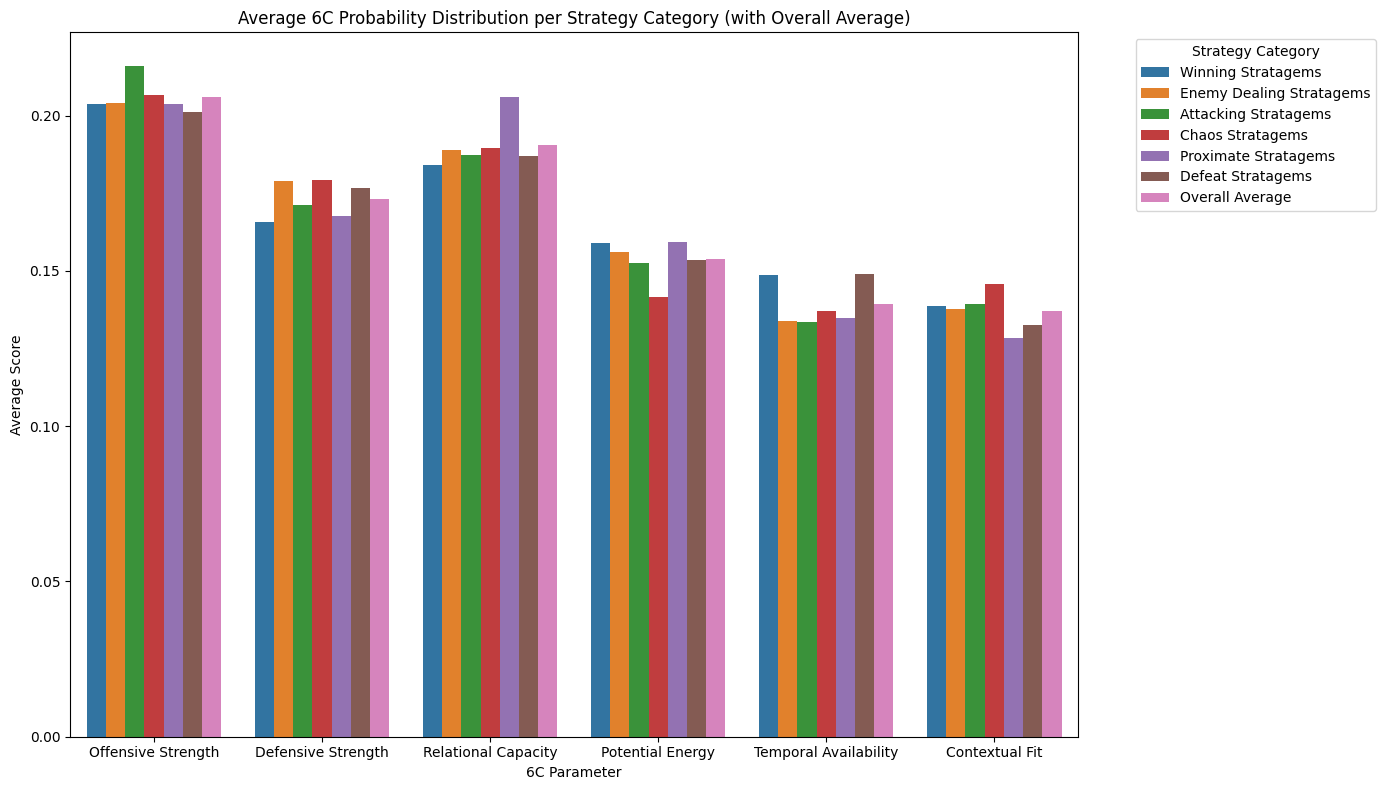

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sixc_labels = {
    'ความสามารถในการรุก': 'Offensive Strength',
    'ความสามารถในการรับ': 'Defensive Strength',
    'การประสานงานระหว่างหมาก': 'Relational Capacity',
    'ทรัพยากรที่ยังไม่ใช้': 'Potential Energy',
    'ความได้เปรียบด้านเวลา': 'Temporal Availability',
    'ความเหมาะสมกับสถานการณ์': 'Contextual Fit'
}
sixc_labels_english = list(sixc_labels.values())

category_labels = {
    'กลยุทธ์ชนะศึก': 'Winning Stratagems',
    'กลยุทธ์เผชิญศึก': 'Enemy Dealing Stratagems',
    'กลยุทธ์เข้าตี': 'Attacking Stratagems',
    'กลยุทธ์ติดพัน': 'Chaos Stratagems',
    'กลยุทธ์ร่วมรบ': 'Proximate Stratagems',
    'กลยุทธ์ยามพ่าย': 'Defeat Stratagems'
}

if 'all_strategies_6c_comparison' not in globals():
    print("6C comparison data not found. Please run the cell to collect metrics first.")
else:
    print("Calculating and plotting average 6C Probability Distribution per Strategy Category...")

    # --- เก็บค่า pattern ของแต่ละ category ---
    sixc_patterns_by_category = {category: [] for category in merged_df['หมวด'].unique()}

    all_patterns = []  # ✅ เก็บ pattern ของทุกกลยุทธ์เพื่อนำมาคำนวณ Overall Average

    for strategy_name, patterns in all_strategies_6c_comparison.items():
        category = merged_df[merged_df['Strategy Name'] == strategy_name]['หมวด'].iloc[0]
        strategy_pattern = [item['Strategy Score'] for item in patterns]  # list ของ array 6 ค่า
        sixc_patterns_by_category[category].append(strategy_pattern)
        all_patterns.append(strategy_pattern)  # ✅ เก็บเป็น list ซ้อน list (ไม่แผ่)

    # --- เตรียมข้อมูล plot ---
    plot_data = []
    for category, patterns_list in sixc_patterns_by_category.items():
        if patterns_list:
            avg_pattern = np.mean(np.array(patterns_list), axis=0)
            category_en = category_labels.get(category, category)
            for i, label in enumerate(sixc_labels_english):
                plot_data.append({'Category': category_en, '6C Parameter': label, 'Average Score': avg_pattern[i]})

    # ✅ คำนวณ Overall Average
    overall_avg_pattern = np.mean(np.array(all_patterns), axis=0)
    for i, label in enumerate(sixc_labels_english):
        plot_data.append({'Category': 'Overall Average', '6C Parameter': label, 'Average Score': overall_avg_pattern[i]})

    # --- สร้าง DataFrame สำหรับ plot ---
    plot_df = pd.DataFrame(plot_data)

    # --- Plot ---
    plt.figure(figsize=(14, 8))
    sns.barplot(x='6C Parameter', y='Average Score', hue='Category', data=plot_df)
    plt.title('Average 6C Probability Distribution per Strategy Category (with Overall Average)')
    plt.xlabel('6C Parameter')
    plt.ylabel('Average Score')
    plt.xticks(rotation=0)
    plt.legend(title='Strategy Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


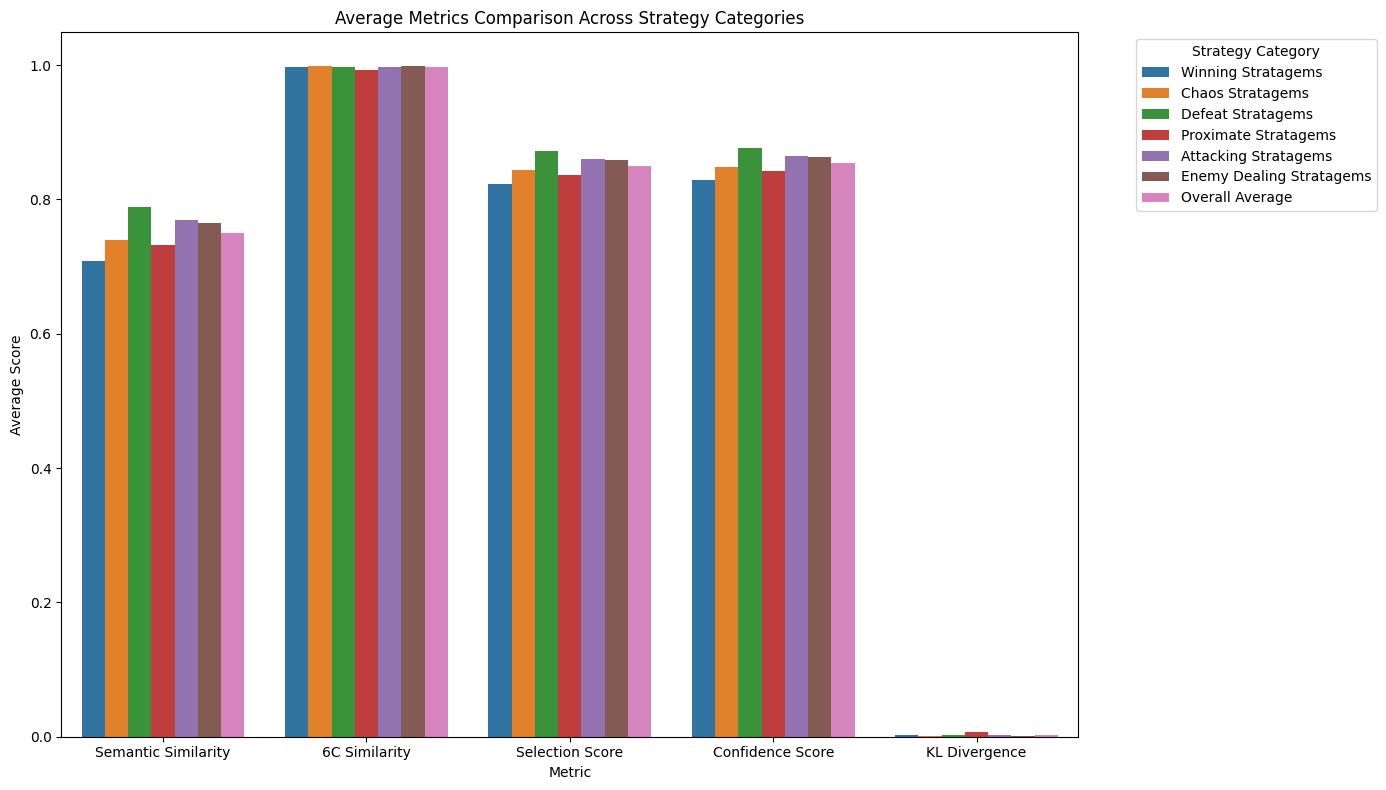

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# สมมติว่าคุณมี DataFrame ชื่อ avg_metrics_by_category (6 หมวด) ที่มีคอลัมน์:
# 'หมวด', 'avg_semantic_similarity', 'avg_sixc_similarity', 'avg_selection_score', 'avg_confidence_score', 'avg_kl_divergence'

# และค่า overall average แยกต่างหาก (ที่คุณคำนวณไว้แล้ว)
# สร้าง dict หรือ dataframe สำหรับ overall average
overall_avg_dict = {
    'หมวด': 'Overall Average',
    'avg_semantic_similarity': avg_semantic_similarity,
    'avg_sixc_similarity': avg_sixc_similarity,
    'avg_selection_score': avg_selection_score,
    'avg_confidence_score': avg_confidence_score,
    'avg_kl_divergence': avg_kl_divergence
}

# เพิ่ม overall average ลงใน dataframe ของหมวด
avg_metrics_combined = pd.concat([
    avg_metrics_by_category,
    pd.DataFrame([overall_avg_dict])
], ignore_index=True)

# แปลง dataframe จาก wide format เป็น long format เพื่อสะดวก plot ด้วย seaborn
plot_df = avg_metrics_combined.melt(
    id_vars=['หมวด'],
    value_vars=[
        'avg_semantic_similarity',
        'avg_sixc_similarity',
        'avg_selection_score',
        'avg_confidence_score',
        'avg_kl_divergence'
    ],
    var_name='Metric',
    value_name='Average Score'
)

# แปลชื่อ metric ให้สั้นลงหรือง่ายต่อการอ่าน
metric_name_map = {
    'avg_semantic_similarity': 'Semantic Similarity',
    'avg_sixc_similarity': '6C Similarity',
    'avg_selection_score': 'Selection Score',
    'avg_confidence_score': 'Confidence Score',
    'avg_kl_divergence': 'KL Divergence'
}
plot_df['Metric'] = plot_df['Metric'].map(metric_name_map)

# แปลชื่อหมวดเป็นภาษาอังกฤษหรือชื่อสั้นๆ (ถ้าต้องการ)
category_labels = {
    'กลยุทธ์ชนะศึก': 'Winning Stratagems',
    'กลยุทธ์เผชิญศึก': 'Enemy Dealing Stratagems',
    'กลยุทธ์เข้าตี': 'Attacking Stratagems',
    'กลยุทธ์ติดพัน': 'Chaos Stratagems',
    'กลยุทธ์ร่วมรบ': 'Proximate Stratagems',
    'กลยุทธ์ยามพ่าย': 'Defeat Stratagems',
    'Overall Average': 'Overall Average'
}
plot_df['Category'] = plot_df['หมวด'].map(category_labels)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Metric',
    y='Average Score',
    hue='Category',
    data=plot_df,
    palette='tab10'
)
plt.title('Average Metrics Comparison Across Strategy Categories')
plt.xlabel('Metric')
plt.ylabel('Average Score')
plt.legend(title='Strategy Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
